# Futurization and Model Tuning Project


## Context:
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

## Attribute Information: 
__Cement__ : measured in kg in a m3 mixture <br>
__Blast__ : measured in kg in a m3 mixture <br>
__Fly ash__ : measured in kg in a m3 mixture <br>
__Water__ : measured in kg in a m3 mixture <br>
__Superplasticizer__ : measured in kg in a m3 mixture <br>
__Coarse Aggregate__ : measured in kg in a m3 mixture <br>
__Fine Aggregate__ : measured in kg in a m3 mixture <br>
__Age__ : day (1~365) <br>
__Concrete compressive strength__: measured in MPa <br>


## Objective:
Modeling of strength of high performance concrete using Machine Learning

### Import Libraries

In [589]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from scipy import stats
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import pearsonr
from scipy.stats import randint as sp_randint
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import cdist



### Load CSV Data

In [687]:
df = pd.read_csv("concrete.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [591]:
#Size of the data
df.shape

(1030, 9)

In [592]:
# Fields info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


__Observations__: All are numeric type only. No variable is with object type.
cement, slag, ash, water, superplastic, coarseagg, fineagg, age are independent variables where as the strenght is the dependent and target variable.

## Deliverable -1 (Exploratory data quality report reflecting the following)

### a. Univariate analysis 
i. Univariate analysis – data types and description of the
independent attributes which should include (name,
meaning, range of values observed, central values (mean
and median), standard deviation and quartiles, analysis of
the body of distributions / tails, missing values, outliers

In [593]:
#display 5 point summary at high level which includes statistics like count, mean and std for each individual variable.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


------ For Attribute "cement" -----------  
Data type of  cement    float64
dtype: object
Min =  102.0
Max =  540.0
Mean =  281.1678640776698
Median =  272.9
Standard Deviation =  104.50636449481536
Q1 =  192.375
Q2 =  272.9
Q3 =  350.0
Range =  438.0
IQR =  157.625
Lower Bound =  -44.0625
Upper Bound =  586.4375
Lower outliers count =  0
Upper outliers count =  0
Missing Values =  0
Skew =  0.5094811788717731
Observation: Positively skewed with tail on the right side


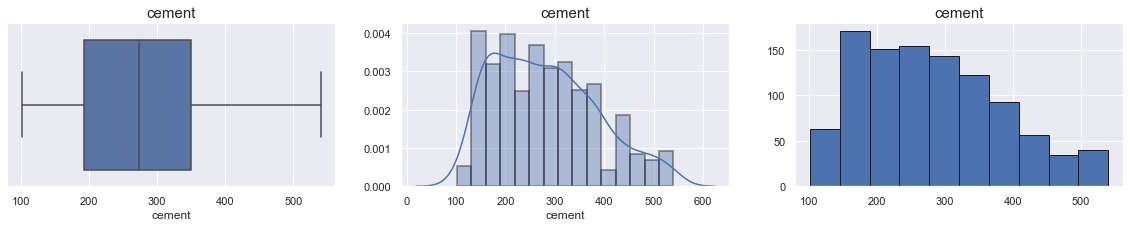



------ For Attribute "slag" -----------  
Data type of  slag    float64
dtype: object
Min =  0.0
Max =  359.4
Mean =  73.89582524271844
Median =  22.0
Standard Deviation =  86.2793417481054
Q1 =  0.0
Q2 =  22.0
Q3 =  142.95
Range =  359.4
IQR =  142.95
Lower Bound =  -214.42499999999998
Upper Bound =  357.375
Lower outliers count =  0
Upper outliers count =  2
Missing Values =  0
Skew =  0.8007168956061774
Observation: Positively skewed with tail on the right side


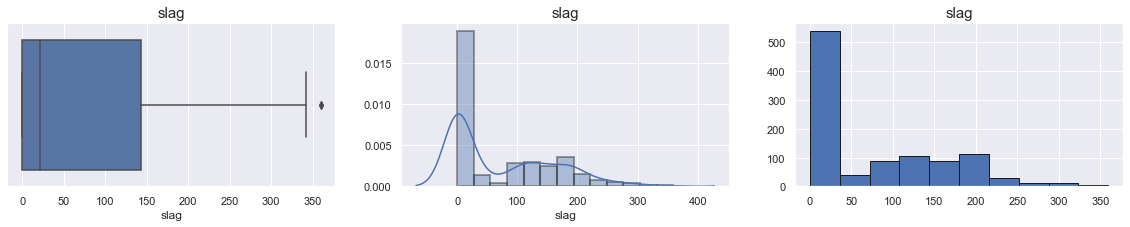



------ For Attribute "ash" -----------  
Data type of  ash    float64
dtype: object
Min =  0.0
Max =  200.1
Mean =  54.188349514563086
Median =  0.0
Standard Deviation =  63.99700415268794
Q1 =  0.0
Q2 =  0.0
Q3 =  118.3
Range =  200.1
IQR =  118.3
Lower Bound =  -177.45
Upper Bound =  295.75
Lower outliers count =  0
Upper outliers count =  0
Missing Values =  0
Skew =  0.5373539058066844
Observation: Positively skewed with tail on the right side


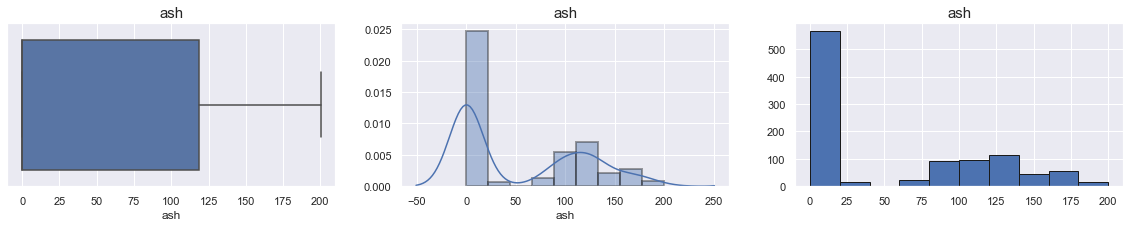



------ For Attribute "water" -----------  
Data type of  water    float64
dtype: object
Min =  121.8
Max =  247.0
Mean =  181.56728155339798
Median =  185.0
Standard Deviation =  21.35421856503245
Q1 =  164.9
Q2 =  185.0
Q3 =  192.0
Range =  125.2
IQR =  27.099999999999994
Lower Bound =  124.25000000000001
Upper Bound =  232.64999999999998
Lower outliers count =  5
Upper outliers count =  4
Missing Values =  0
Skew =  0.07462838428549402
Observation: Positively skewed with tail on the right side


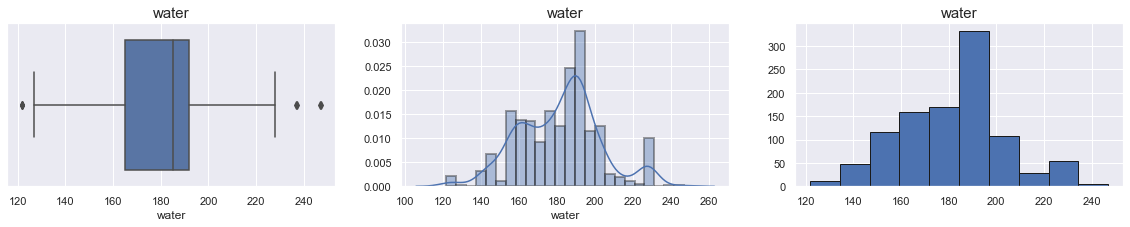



------ For Attribute "superplastic" -----------  
Data type of  superplastic    float64
dtype: object
Min =  0.0
Max =  32.2
Mean =  6.204660194174756
Median =  6.4
Standard Deviation =  5.973841392485508
Q1 =  0.0
Q2 =  6.4
Q3 =  10.2
Range =  32.2
IQR =  10.2
Lower Bound =  -15.299999999999999
Upper Bound =  25.5
Lower outliers count =  0
Upper outliers count =  10
Missing Values =  0
Skew =  0.9072025748672466
Observation: Positively skewed with tail on the right side


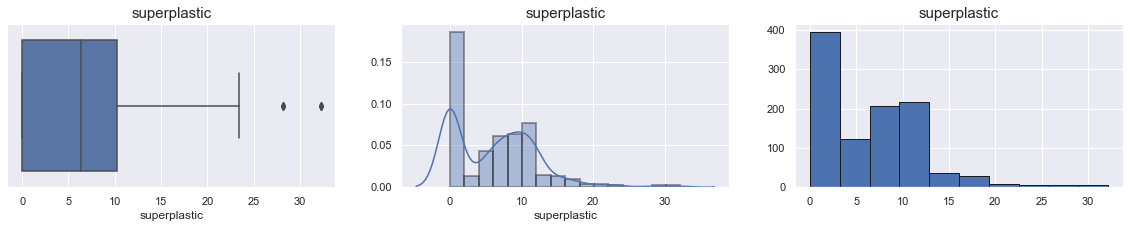



------ For Attribute "coarseagg" -----------  
Data type of  coarseagg    float64
dtype: object
Min =  801.0
Max =  1145.0
Mean =  972.918932038835
Median =  968.0
Standard Deviation =  77.75395396672087
Q1 =  932.0
Q2 =  968.0
Q3 =  1029.4
Range =  344.0
IQR =  97.40000000000009
Lower Bound =  785.8999999999999
Upper Bound =  1175.5000000000002
Lower outliers count =  0
Upper outliers count =  0
Missing Values =  0
Skew =  -0.04021974481106704
Observation: Somewhat normally distributed


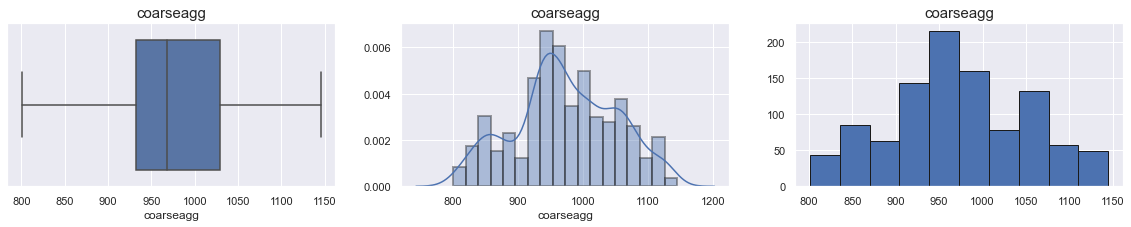



------ For Attribute "fineagg" -----------  
Data type of  fineagg    float64
dtype: object
Min =  594.0
Max =  992.6
Mean =  773.5804854368932
Median =  779.5
Standard Deviation =  80.17598014240443
Q1 =  730.9499999999999
Q2 =  779.5
Q3 =  824.0
Range =  398.6
IQR =  93.05000000000007
Lower Bound =  591.3749999999998
Upper Bound =  963.575
Lower outliers count =  0
Upper outliers count =  5
Missing Values =  0
Skew =  -0.25300959769707143
Observation: Neagativly skewed with tail on the left side


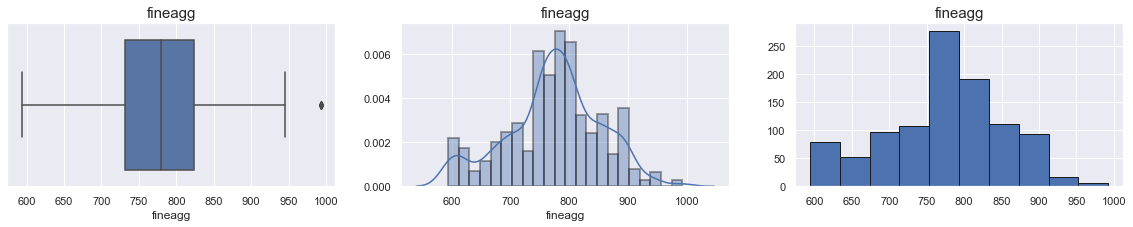



------ For Attribute "age" -----------  
Data type of  age    int64
dtype: object
Min =  1
Max =  365
Mean =  45.662135922330094
Median =  28.0
Standard Deviation =  63.16991158103279
Q1 =  7.0
Q2 =  28.0
Q3 =  56.0
Range =  364
IQR =  49.0
Lower Bound =  -66.5
Upper Bound =  129.5
Lower outliers count =  0
Upper outliers count =  59
Missing Values =  0
Skew =  3.2691774006345895
Observation: Positively skewed with tail on the right side


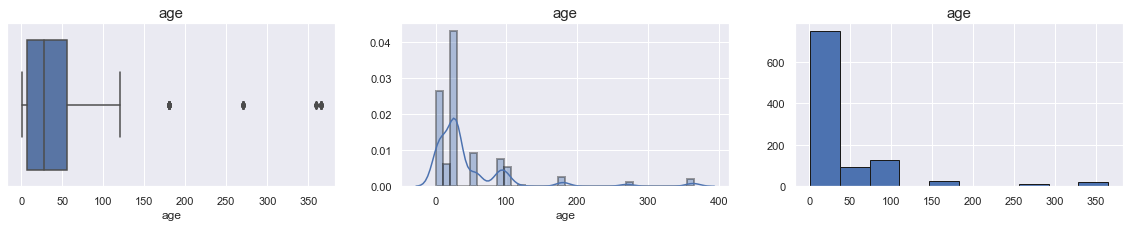



------ For Attribute "strength" -----------  
Data type of  strength    float64
dtype: object
Min =  2.33
Max =  82.6
Mean =  35.81796116504854
Median =  34.445
Standard Deviation =  16.70574196191251
Q1 =  23.709999999999997
Q2 =  34.445
Q3 =  46.135000000000005
Range =  80.27
IQR =  22.425000000000008
Lower Bound =  -9.927500000000013
Upper Bound =  79.77250000000001
Lower outliers count =  0
Upper outliers count =  4
Missing Values =  0
Skew =  0.41697728841071807
Observation: Positively skewed with tail on the right side


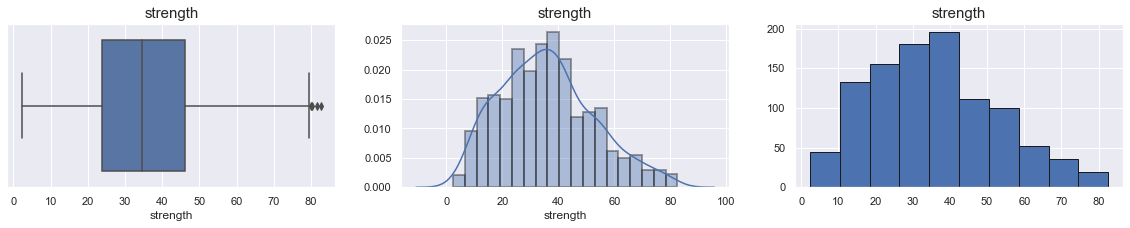

In [594]:
for column in list(df): 
    print('------ For Attribute "%s" -----------  ' %(column))
    ## Data type
    print('Data type of ',df[[column]].dtypes)
    ## Min, Max, Mean, Median and Standar Deviation
    print('Min = ',df[column].min())
    print('Max = ',df[column].max())
    print('Mean = ',df[column].mean())
    print('Median = ',df[column].median())
    print('Standard Deviation = ',df[column].std())
    ## Quartile Q1,Q2,Q3 for this attribute are
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.50)
    Q3 = df[column].quantile(0.75)
    print('Q1 = ',Q1)
    print('Q2 = ',Q2)
    print('Q3 = ',Q3)
    ## Attribute Complete Range
    print('Range = ', (df[column].max()-df[column].min()))
    ## Attribute  Interquartile Ranage
    iqr = stats.iqr(df[column])
    print('IQR = ', iqr)
    ## Attribute  lower Bound
    print('Lower Bound = ',Q1 -(1.5 * iqr))
    ## Attribute  Upper Bound 
    print('Upper Bound = ',Q3 + (1.5 * iqr))
    ## No of lower outliers
    print('Lower outliers count = ',df[column][df[column]<(Q1 -(1.5 * iqr))].count())
    ## No of Upper outliers
    print('Upper outliers count = ',df[column][df[column]>(Q3 +(1.5 * iqr))].count())
    ##Missing Values
    print('Missing Values = ',df[column].isna().sum())
    ## Skewness of the attribute
    skew = df[column].skew()
    print('Skew = ',skew)
    if( skew < -0.05 ):
        print("Observation: Neagativly skewed with tail on the left side")
    elif( skew  > 0.05 ):
        print("Observation: Positively skewed with tail on the right side")
    elif( skew == 0):
        print("Observation: No skewness identified")
    else:
        print("Observation: Somewhat normally distributed")
        
    fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,3))
    #Boxplot
    sns.boxplot(x=column,data=df,orient='h',ax=ax1)
    ax1.set_title(column, fontsize=15)
    
    #Distplot
    sns.distplot(df[column],ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
    ax2.set_title(column, fontsize=15)
    
    #Histogram
    ax3.hist(df[column],bins=10, edgecolor="k")
    ax3.set_title(column, fontsize=15)
    plt.pause(0.1)
    
    print('\n')

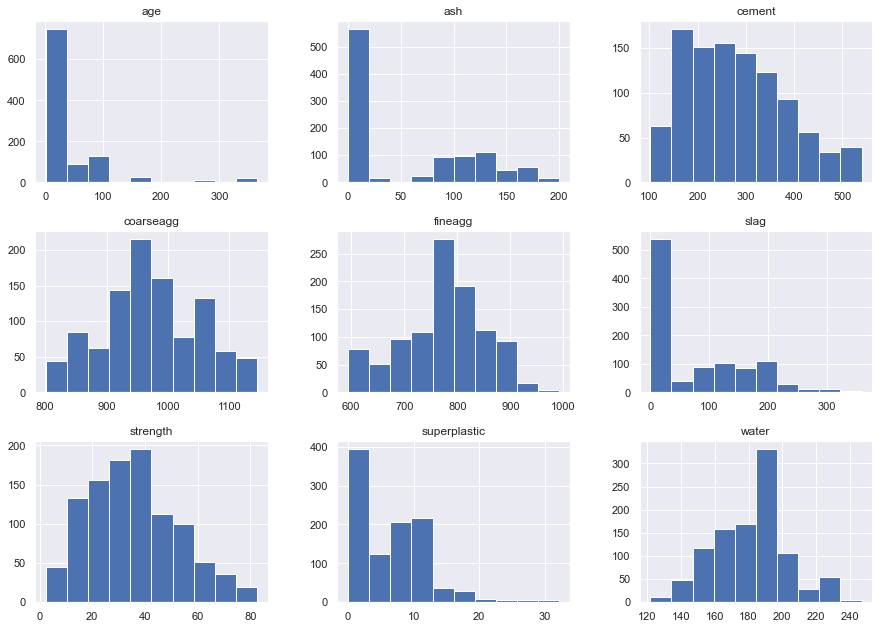

In [595]:
## All the attribute's histograms at one place
df[list(df)].hist(bins=10, figsize=(15,30), layout=(8,3)); 

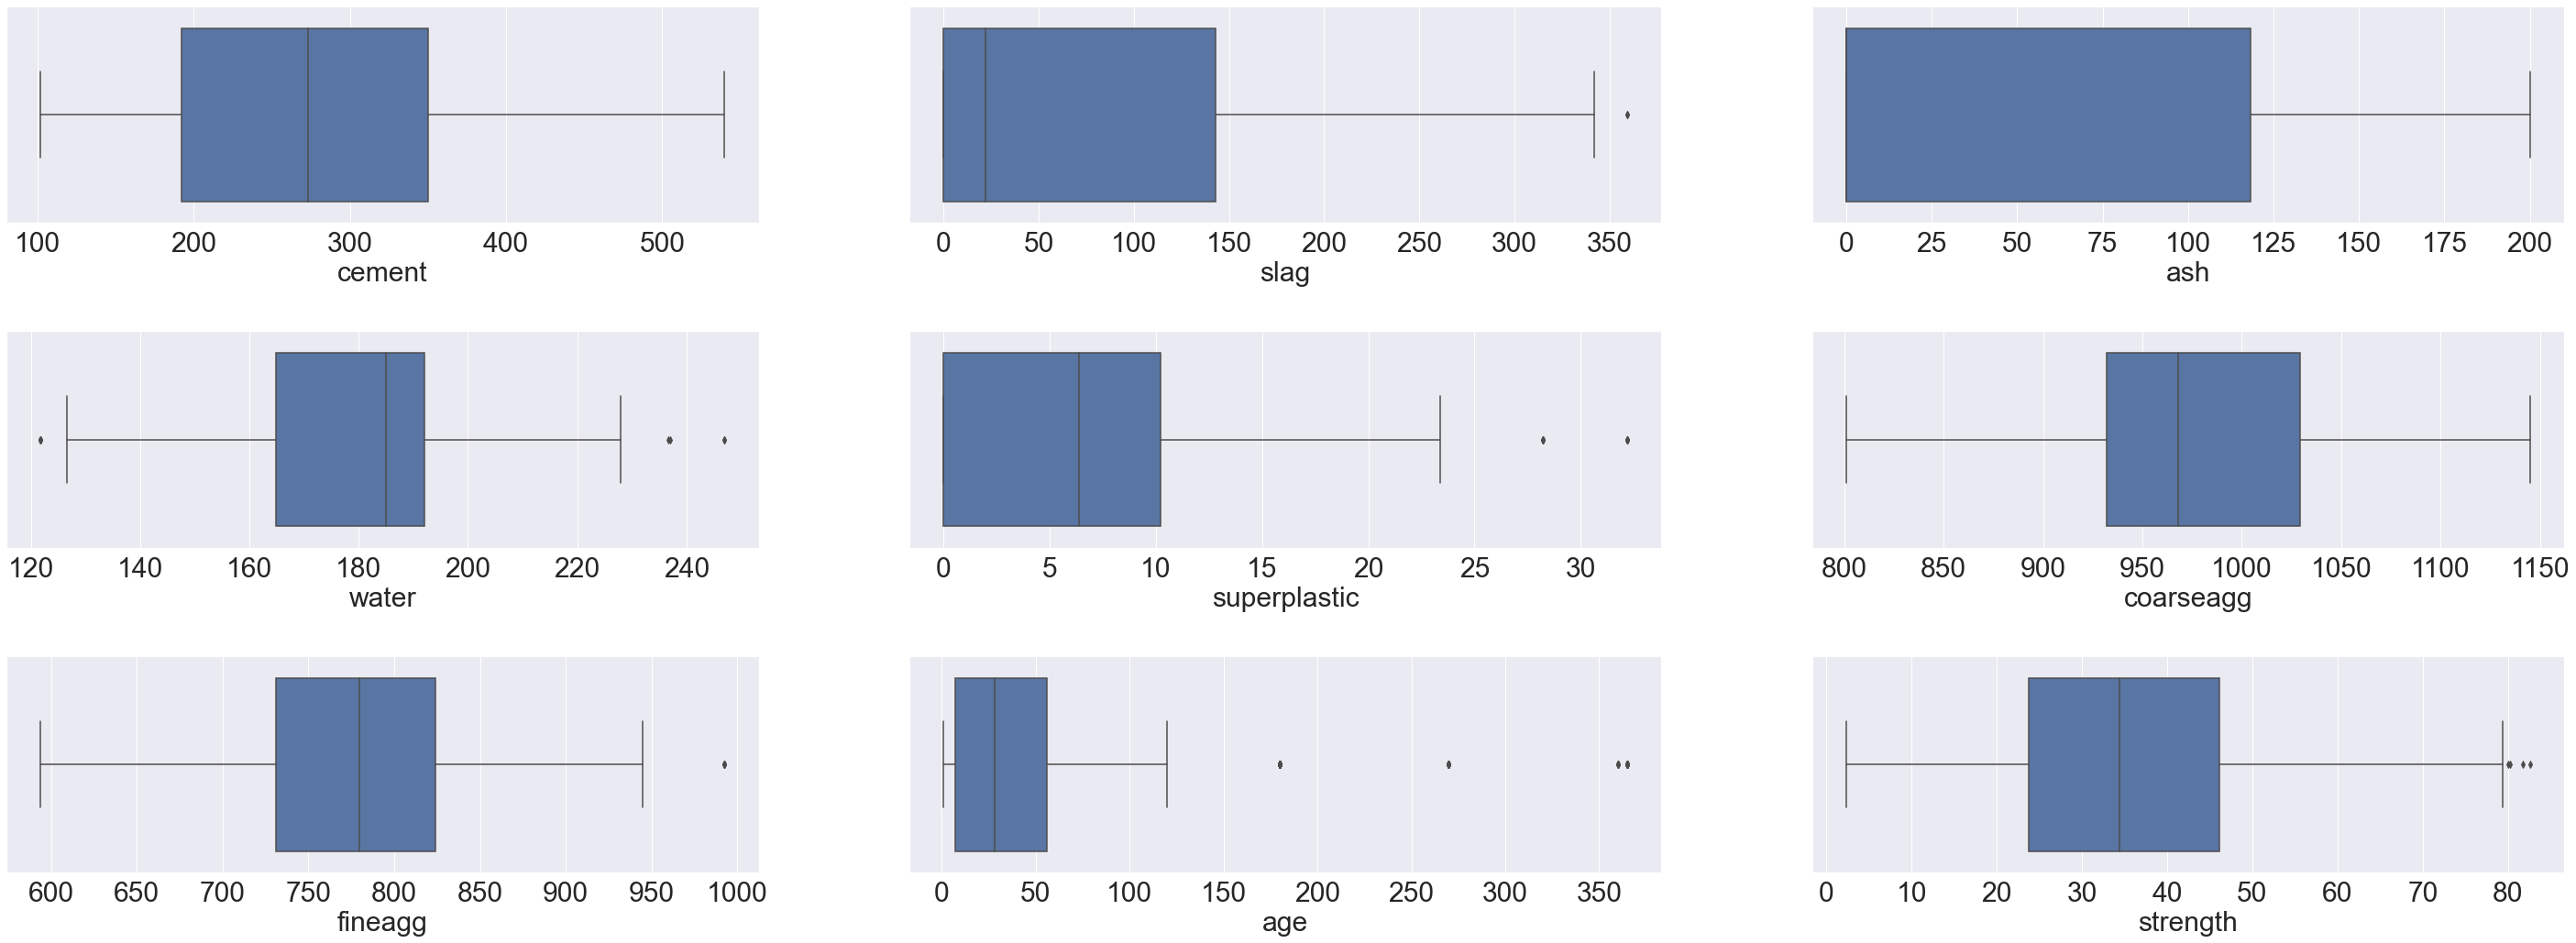

In [596]:
## All the attribute's boxplots at one place
plt.figure(figsize= (50,50))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
i=1
for feature in df.columns: # Loop through all columns in the dataframe
    plt.subplot(8,3,i)
    b = sns.boxplot(x= df[feature])
    b.set_xlabel(feature,fontsize=30)
    b.tick_params(labelsize=30)
    i=i+1

### b. Multivariate analysis
i. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points.Visualize the analysis using boxplots and pair plots,histograms or density curves. Select the most appropriate attributes.

In [597]:
#Corelation matrix between all the attributes
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


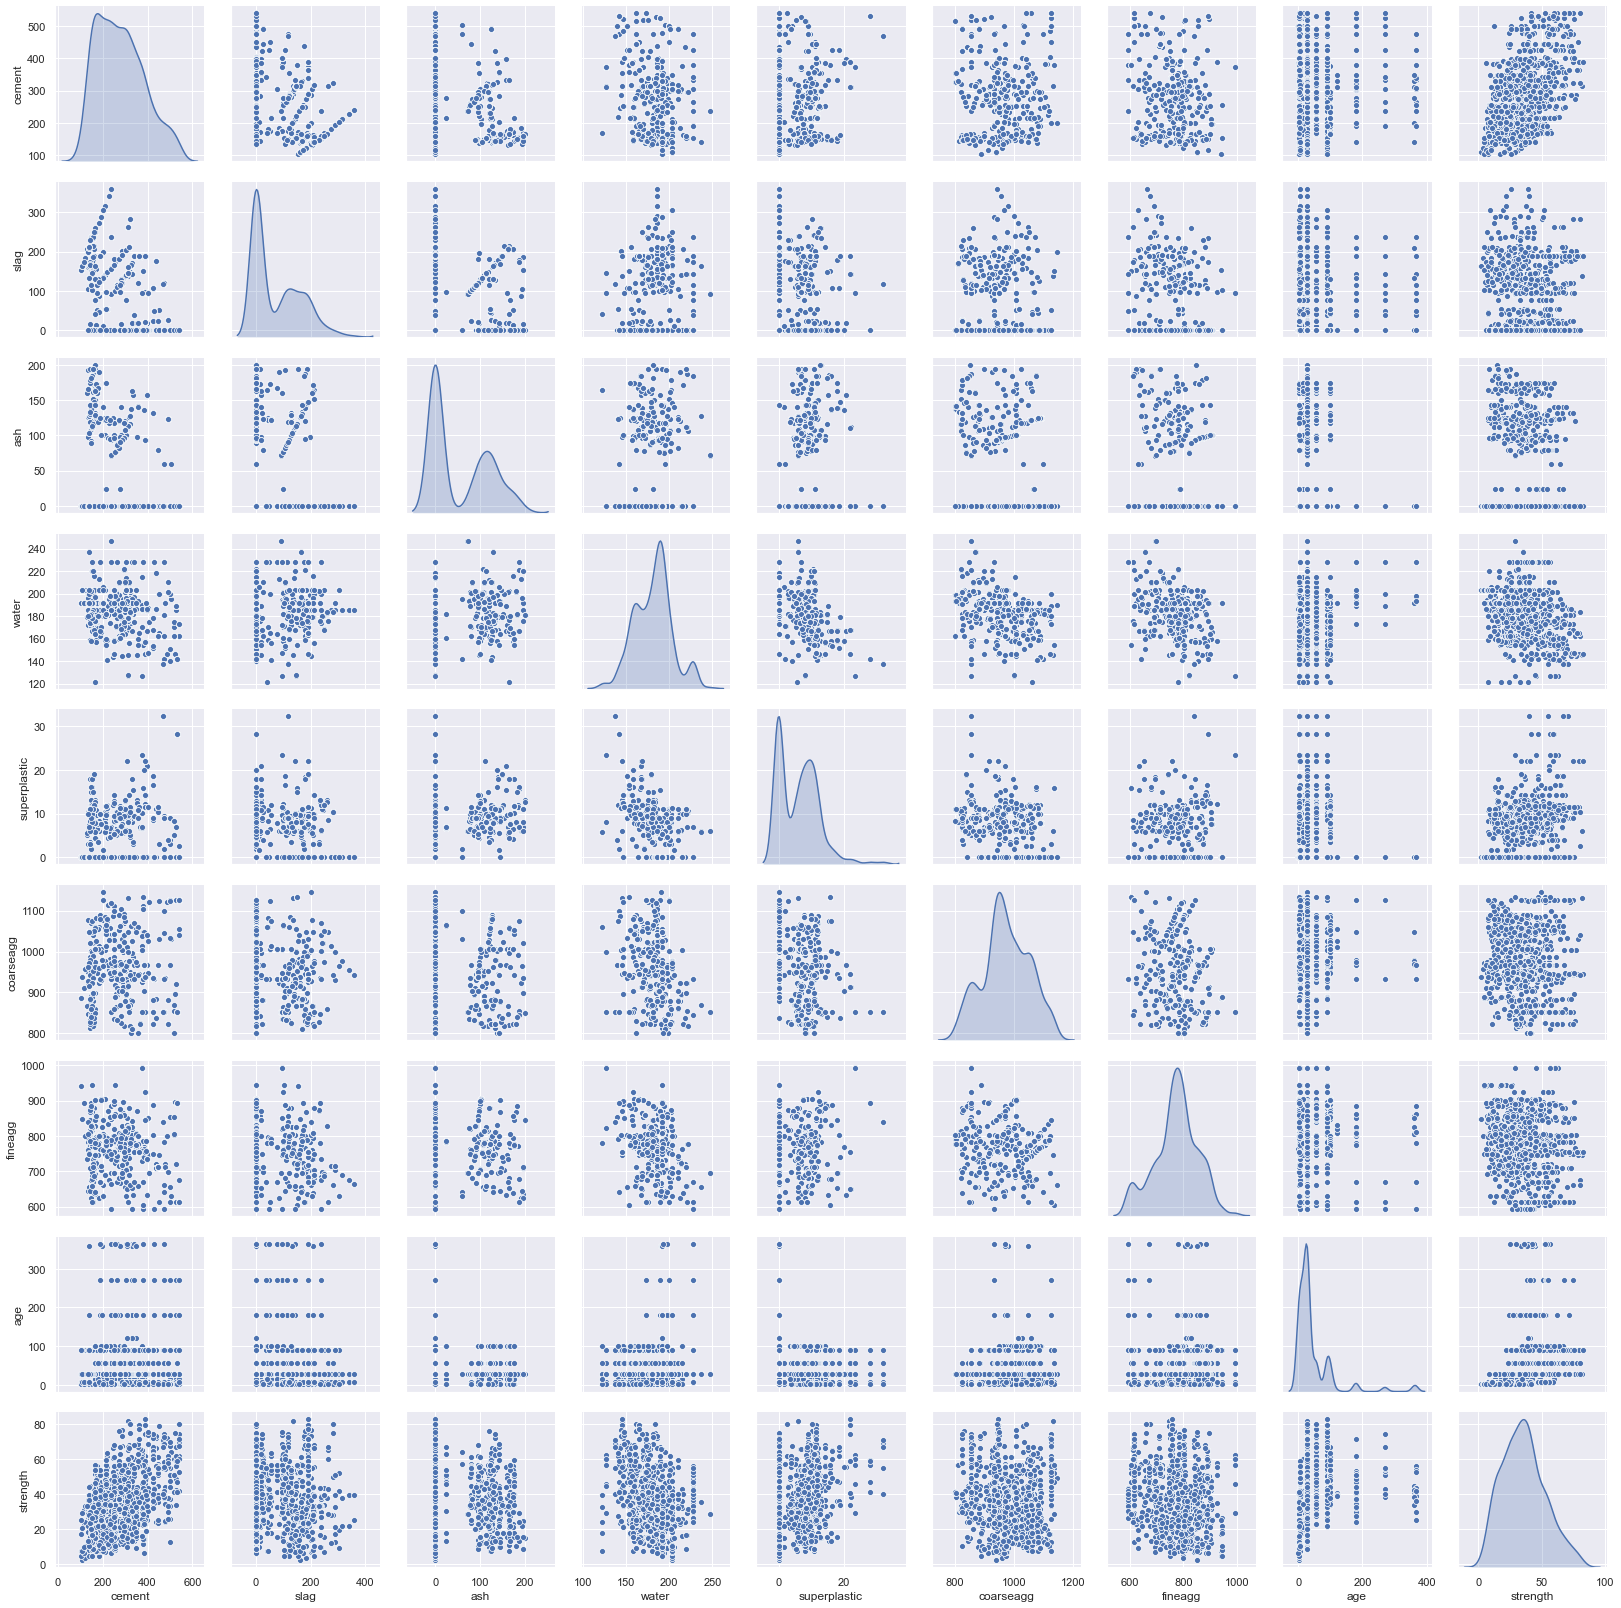

In [598]:
## pairplot- plot density curve for all the attributes
sns.pairplot(df, diag_kind='kde')

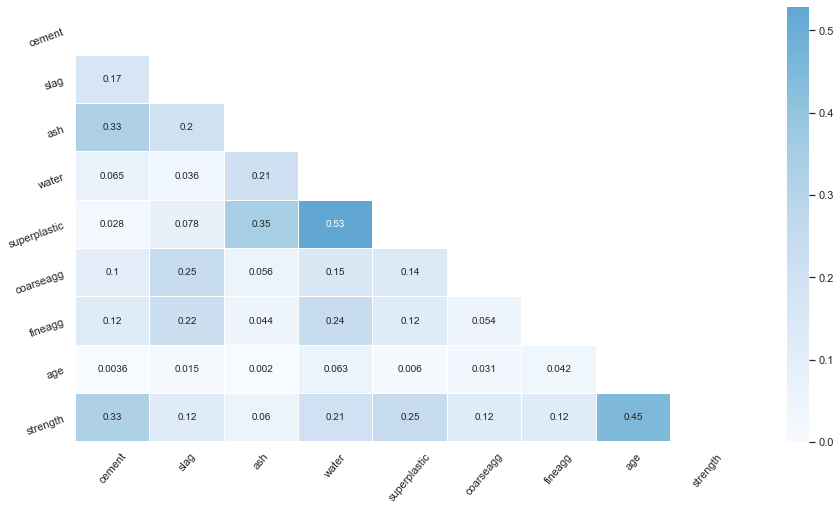

In [599]:
## Heatmap
corr = abs(df.corr(method='kendall')) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 0.01, mask = mask,linecolor="white")   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

__Observations__: All the variable looks independent to each other. There is no positive or negative relation between the variable. 
But if we observe carefully strengh is somewhat corelated with age and cement. Same way superplastic is corelated with ash and water.

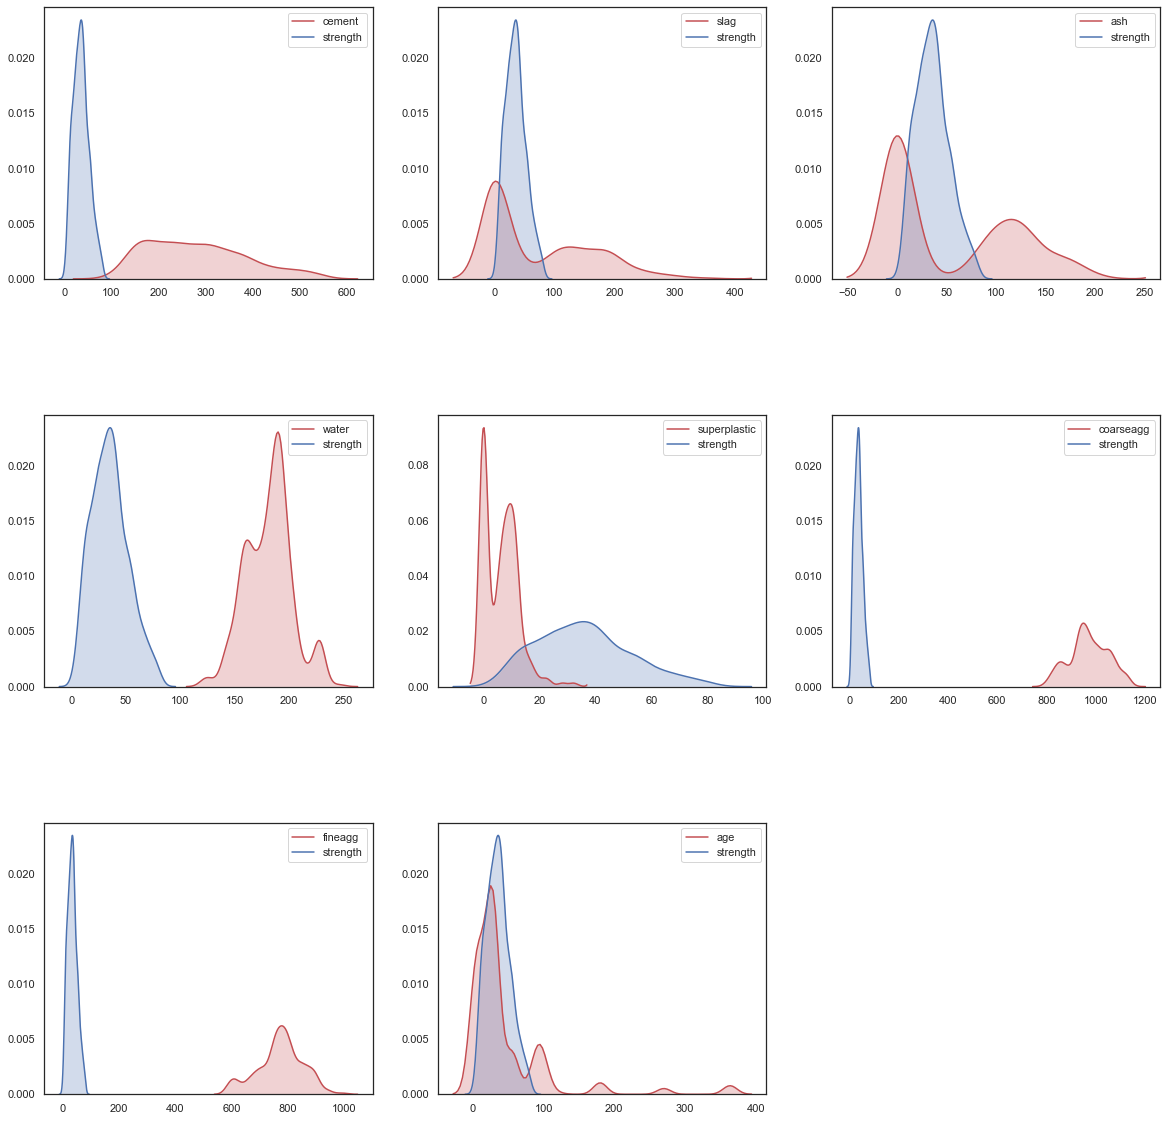

In [600]:
## Density kdeplots to represent the relationship between the target variable 'strengh' and the other variables
plt.figure(figsize= (20,20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
i = 1
for column in list(df.drop(["strength"],axis=1)): 
    plt.subplot(3,3,i)
    p1=sns.kdeplot(df[column], shade=True, color="r")
    p1=sns.kdeplot(df['strength'], shade=True, color="b")
    i=i+1


__Observations__:<br>
    Through these density plots we can observe below things.<br>
    Target variable strength is highly corelated with age variable.<br>
    Very less dependency of strenght on the variables fineagg, coarseagg and water.

### c. Pick one strategy to address the presence outliers and missingvalues and perform necessary imputation


In [601]:
## Check any missing values
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [602]:
## Any nulls present
df.isnull().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [603]:
# Any "?" data. Obviously as all variables are numeric we are sure that there won't be any such type of characters in the data.
df[df.eq('?').any(axis=1)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


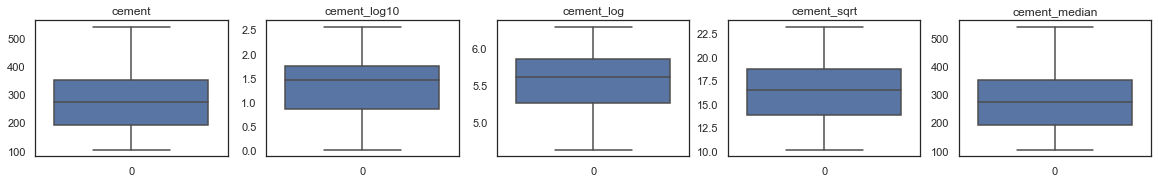

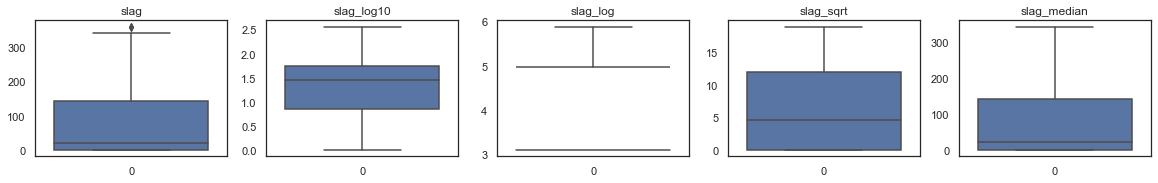

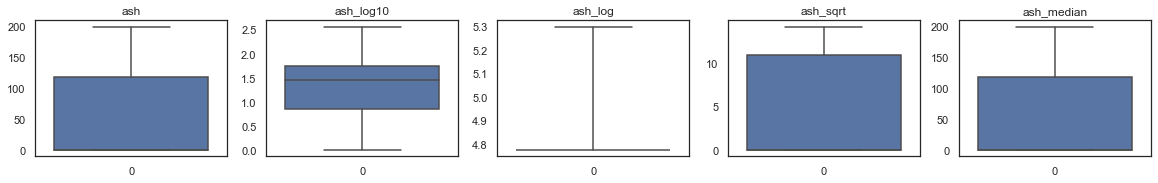

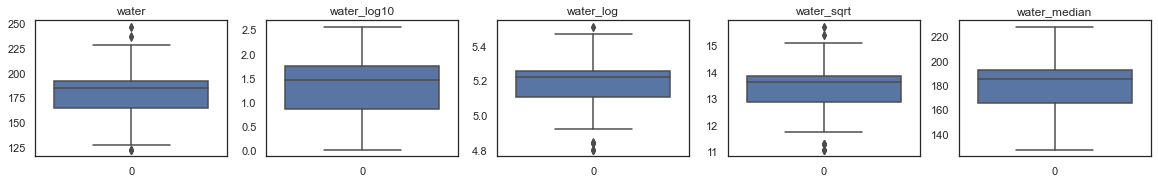

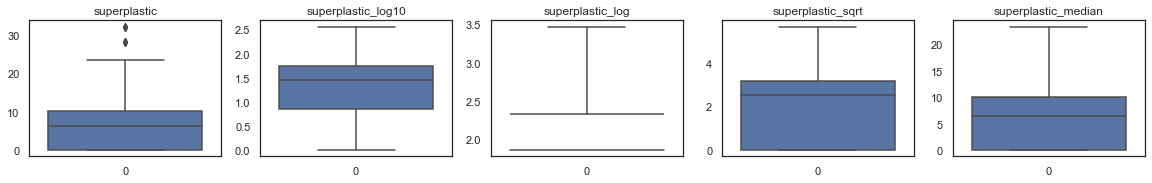

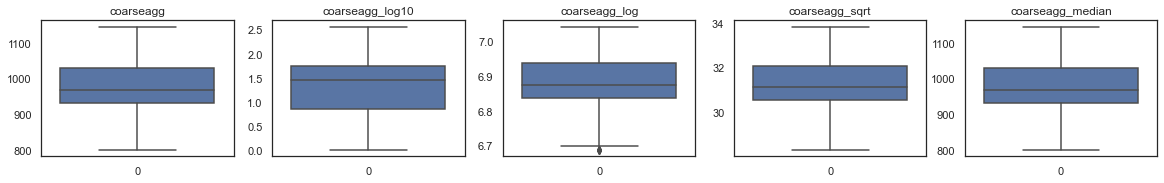

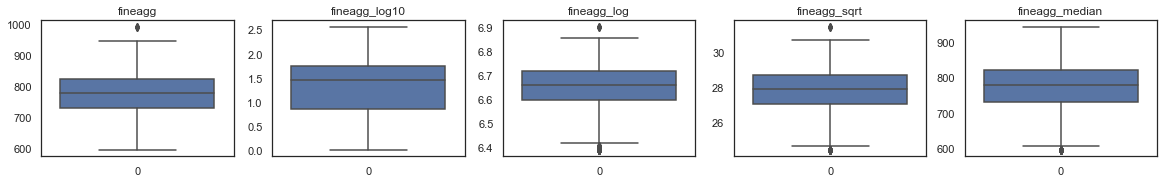

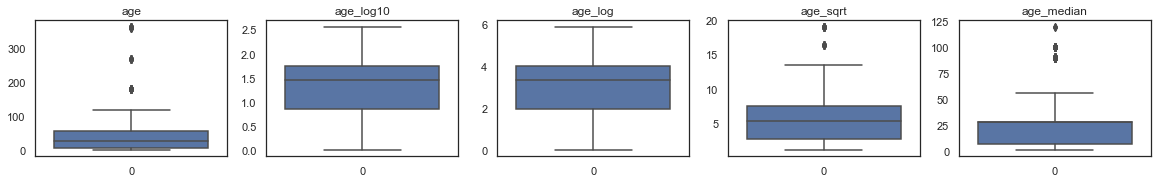

In [604]:
## Checking the result of all the attibutes after applying different types of outlier handling strategies.
columns = list(df.drop(['strength'],axis=1))
df_copy=df.copy()
for column in columns: 
    plt.figure(figsize= (20,10))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    plt.subplot(3,5,1)
    sns.boxplot(data=df[column],orient='v').set_title(column)
    df[column+'_log10'] = np.log10(df['age'])
    plt.subplot(3,5,2)
    sns.boxplot(data=df[column+'_log10'],orient='v').set_title(column+'_log10')
    df[column+'_log'] = np.log(df[column])
    plt.subplot(3,5,3)
    sns.boxplot(data=df[column+'_log'],orient='v').set_title(column+'_log')
    df[column+'_sqrt'] = np.sqrt(df[column])
    plt.subplot(3,5,4)
    sns.boxplot(data=df[column+'_sqrt'],orient='v').set_title(column+'_sqrt')
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    iqr = Q3 - Q1
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df[column+'_median']=df[column]
    df.loc[(df[column+'_median'] < low) | (df[column+'_median'] > high), column+'_median'] = df[column+'_median'].median()
    plt.subplot(3,5,5)
    sns.boxplot(data=df[column+'_median'],orient='v').set_title(column+'_median')
    
df=df_copy.copy()   


Total outliers for cement = 0
Total outliers for slag = 2
Total outliers for ash = 0
Total outliers for water = 9
Total outliers for superplastic = 10
Total outliers for coarseagg = 0
Total outliers for fineagg = 5
Total outliers for age = 59


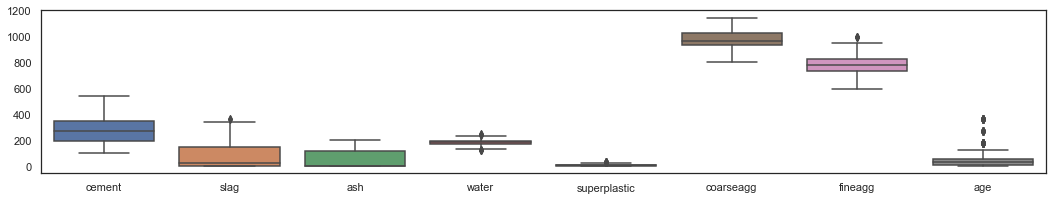

In [605]:
## Identify the current outliers. Both count and the boxplots
for column in list(df.drop(["strength"],axis=1)):
    ## Quartile Q1,Q2,Q3 for this attribute are
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.50)
    Q3 = df[column].quantile(0.75)
    ## Attribute  Interquartile Ranage
    iqr = stats.iqr(df[column])
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    ## No of lower outliers
    lwotl = df[column][df[column]<low].count()
    ## No of Upper outliers
    upotl = df[column][df[column]>high].count()
    ## Total outliers
    total = lwotl+upotl
    print('Total outliers for %s = %d' %(column, total))
    
#Checking for outliers
plt.figure(figsize= (18,3))
sns.boxplot(data=df.drop(["strength"],axis=1),orient='v')

In [606]:
## As some of the attributes are left skewed we cannt apply log transfermation. So we can go with the median replacement for the outliers.
## Replacing the outliers by median
df_trans=df.copy()
for column in list(df.drop(["strength"],axis=1)):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    iqr = Q3 - Q1
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df_trans.loc[(df_trans[column] < low) | (df_trans[column] > high), column] = df_trans[column].median()

In [607]:
## Identify the outliers after imputing the median values. Both count and the boxplots
for column in list(df_trans.drop(["strength"],axis=1)):
    ## Quartile Q1,Q2,Q3 for this attribute are
    Q1 = df_trans[column].quantile(0.25)
    Q2 = df_trans[column].quantile(0.50)
    Q3 = df_trans[column].quantile(0.75)
    ## Attribute  Interquartile Ranage
    iqr = stats.iqr(df_trans[column])
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    ## No of lower outliers
    lwotl = df_trans[column][df_trans[column]<low].count()
    ## No of Upper outliers
    upotl = df_trans[column][df_trans[column]>high].count()
    ## Total outliers
    total = lwotl+upotl
    print('Total outliers for %s = %d' %(column, total))
    
# #Checking for outliers
# plt.figure(figsize= (18,3))
# sns.boxplot(data=df_trans.drop(["strength"],axis=1),orient='v')

Total outliers for cement = 0
Total outliers for slag = 0
Total outliers for ash = 0
Total outliers for water = 0
Total outliers for superplastic = 0
Total outliers for coarseagg = 0
Total outliers for fineagg = 30
Total outliers for age = 131


In [608]:
## As still some outliers are there for age and fineagg.
## We can applly the log transfermation to age as its positively skewed.
df_trans['age'] = np.log10(df['age'])
## We will apply the median replacement to the outliers of fineagg until all the outliers count became zero.
for i in range(1,10):
    Q1 = df_trans['fineagg'].quantile(0.25)
    Q3 = df_trans['fineagg'].quantile(0.75)
    iqr = Q3 - Q1
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df_trans.loc[(df_trans['fineagg'] < low) | (df_trans['fineagg'] > high), 'fineagg'] = df_trans['fineagg'].median()
    ## Quartile Q1,Q2,Q3 for this attribute are
    Q1 = df_trans['fineagg'].quantile(0.25)
    Q2 = df_trans['fineagg'].quantile(0.50)
    Q3 = df_trans['fineagg'].quantile(0.75)
    ## Attribute  Interquartile Ranage
    iqr = stats.iqr(df_trans['fineagg'])
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    ## No of lower outliers
    lwotl = df_trans['fineagg'][df_trans['fineagg']<low].count()
    ## No of Upper outliers
    upotl = df_trans['fineagg'][df_trans['fineagg']>high].count()
    ## Total outliers
    total = lwotl+upotl
    print('Total outliers for %s = %d' %('fineagg', total))
    i = i+1
    if(total==0):
        break

## We can apply the 

Total outliers for fineagg = 50
Total outliers for fineagg = 23
Total outliers for fineagg = 16
Total outliers for fineagg = 1
Total outliers for fineagg = 0


In [609]:
## Identify the outliers after imputing the median values. Both count and the boxplots
for column in list(df_trans.drop(["strength"],axis=1)):
    ## Quartile Q1,Q2,Q3 for this attribute are
    Q1 = df_trans[column].quantile(0.25)
    Q2 = df_trans[column].quantile(0.50)
    Q3 = df_trans[column].quantile(0.75)
    ## Attribute  Interquartile Ranage
    iqr = stats.iqr(df_trans[column])
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    ## No of lower outliers
    lwotl = df_trans[column][df_trans[column]<low].count()
    ## No of Upper outliers
    upotl = df_trans[column][df_trans[column]>high].count()
    ## Total outliers
    total = lwotl+upotl
    print('Total outliers for %s = %d' %(column, total))

Total outliers for cement = 0
Total outliers for slag = 0
Total outliers for ash = 0
Total outliers for water = 0
Total outliers for superplastic = 0
Total outliers for coarseagg = 0
Total outliers for fineagg = 0
Total outliers for age = 0


__Observation__: Now there are no outliers for any attribute distribution.

## 2. Deliverable -2 (Feature Engineering techniques)

### a. Identify opportunities (if any) to create a composite feature, drop a feature etc. 

__Note__: From the above prirplot or heatmap we can see there there is no much corelation between the independent features.<br>
    Only superplastic and water has some 53% corelation which is also not that much considerable<br>
    So we dont need to create a composite feature from these independent features. Every feature seems to be important for the strength attribute.

In [610]:
## Separate independent and dependent variables
X = df_trans.drop('strength', axis=1)
y = df_trans[['strength']]

In [611]:
#Scaling the features
df_scaled = df_trans.apply(zscore)
#convert the numpy array back into a dataframe 
df_scaled = pd.DataFrame(df_scaled, columns=df_scaled.columns)
df_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.671305,0.140131,-0.355018
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.181568,-0.441919,-0.737108
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.343764,0.140131,-0.395144
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-2.074880,0.140131,0.600806
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-1.597486,0.140131,-1.049727


In [739]:
## Separate independent and dependent variables
X_scaled=df_scaled.drop('strength',axis=1)
y_scaled=df_scaled[['strength']]
## Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled, test_size = 0.3, random_state = 1)

In [613]:
## fit a simple linear model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    

The coefficient for cement is 0.6591708913735261
The coefficient for slag is 0.3992413467401156
The coefficient for ash is 0.19451822486627435
The coefficient for water is -0.3275284439085809
The coefficient for superplastic is 0.0477710199321306
The coefficient for coarseagg is 0.006269658718578555
The coefficient for fineagg is -0.02042360007245962
The coefficient for age is 0.6130333603951322


In [614]:
## Score of the linear regression with all the features
print('Trining accuracy on all the features: %.3f' % regression_model.score(X_train, y_train))
print('Testing accuracy on all the features: %.3f' % regression_model.score(X_test, y_test))


Trining accuracy on all the features: 0.823
Testing accuracy on all the features: 0.823


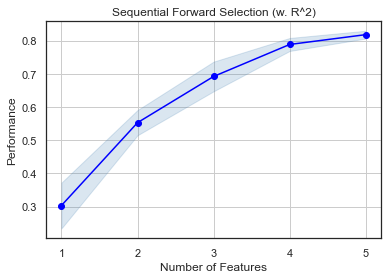

In [615]:
# Build step forward feature selection
sfs1 = sfs(regression_model, k_features=5, forward=True, scoring='r2', cv=5)
# Perform SFFS
sfs1 = sfs1.fit(X_train.values, y_train.values)
# print(sfs1.get_metric_dict())
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [616]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[0, 1, 2, 3, 7]
['cement', 'slag', 'ash', 'water', 'age']


In [617]:
## Score of the linear regression with selected features only
regression_model = LinearRegression()
regression_model.fit(X_train[subsetColumnList], y_train)
print('Trining accuracy on selected features: %.3f' % regression_model.score(X_train[subsetColumnList], y_train))
print('Testing accuracy on selected features: %.3f' % regression_model.score(X_test[subsetColumnList], y_test))

Trining accuracy on selected features: 0.821
Testing accuracy on selected features: 0.822


__Observation__: By removing 3 columns we can observe almost same accuracy in the test dataset.

In [618]:
## Create a regularized RIDGE model and note the coefficients
ridge = Ridge(alpha=.3)
ridge.fit(X_train[subsetColumnList],y_train)
print ("Ridge model:", (ridge.coef_))
for idx, col_name in enumerate(X_train[subsetColumnList].columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[0][idx]))

Ridge model: [[ 0.67748835  0.42203341  0.22560101 -0.34530455  0.61618713]]
The coefficient for cement is 0.6774883544824765
The coefficient for slag is 0.4220334109646608
The coefficient for ash is 0.22560100777147774
The coefficient for water is -0.3453045478263202
The coefficient for age is 0.6161871322113763


In [619]:
## Create a regularized LASSO model and note the coefficients
lasso = Lasso(alpha=0.1)
lasso.fit(X_train[subsetColumnList],y_train)
print ("Lasso model:", (lasso.coef_))
for idx, col_name in enumerate(X_train[subsetColumnList].columns):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))



Lasso model: [ 0.42359187  0.17288456  0.         -0.27121611  0.49105328]
The coefficient for cement is 0.4235918655759042
The coefficient for slag is 0.17288456494970117
The coefficient for ash is 0.0
The coefficient for water is -0.2712161085517101
The coefficient for age is 0.4910532815940723


__Observation__: The coefficients for ash, coarseagg and fineagg became zero.

In [620]:
## Let us compare their scores
print('----Simple Linear Model----')
print('Training score = ',regression_model.score(X_train[subsetColumnList], y_train))
print('Test score = ',regression_model.score(X_test[subsetColumnList], y_test))
print('----Redge Linear Model----')
print('Training score = ',ridge.score(X_train[subsetColumnList], y_train))
print('Test score = ',ridge.score(X_test[subsetColumnList], y_test))
print('----LASSO Linear Model----')
print('Training score = ',lasso.score(X_train[subsetColumnList], y_train))
print('Test score = ',lasso.score(X_test[subsetColumnList], y_test))

----Simple Linear Model----
Training score =  0.8214371815482165
Test score =  0.8221600890047667
----Redge Linear Model----
Training score =  0.8214367570360903
Test score =  0.8221282953936647
----LASSO Linear Model----
Training score =  0.7398472435953469
Test score =  0.7135415967923526


### b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

In [621]:
## Let us generate polynomial models reflecting the non-linear interaction between some dimensions
## For degrees range from 2 to 10
for i in range(2,10):
    print('----------For Degree--------',i)
    poly = PolynomialFeatures(degree = i, interaction_only=True)
    X_poly = poly.fit_transform(X_scaled)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.30, random_state=1)
    print('Shape = ',X_train_poly.shape)
    ## Fit a simple non regularized linear model on poly features-
    regression_model.fit(X_train_poly, y_train_poly)
    ##print(regression_model.coef_[0])
    ## Ridge model
    ridge = Ridge(alpha=.3)
    ridge.fit(X_train_poly,y_train_poly)
    ##print ("Ridge model:", (ridge.coef_))
    ##Lasso model
    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train_poly,y_train_poly)
    ##print ("Lasso model:", (lasso.coef_))
    ## Let us compare their scores
    print('Linear Model')
    print('Training score = ',regression_model.score(X_train_poly, y_train_poly))
    print('Test score = ',regression_model.score(X_test_poly, y_test_poly))
    print('Redge Model')
    print('Training score = ',ridge.score(X_train_poly, y_train_poly))
    print('Test score = ',ridge.score(X_test_poly, y_test_poly))
    print('LASSO Model')
    print('Training score = ',lasso.score(X_train_poly, y_train_poly))
    print('Test score = ',lasso.score(X_test_poly, y_test_poly))
    print ("Lasso model columns:", (lasso.coef_[lasso.coef_!=0]).shape[0])

----------For Degree-------- 2
Shape =  (721, 37)
Linear Model
Training score =  0.8816764355915422
Test score =  0.8832268240174701
Redge Model
Training score =  0.8816745123215807
Test score =  0.8830652857321633
LASSO Model
Training score =  0.8815537089415951
Test score =  0.8816258266499984
Lasso model columns: 34
----------For Degree-------- 3
Shape =  (721, 93)
Linear Model
Training score =  0.9174002317955174
Test score =  0.8854068590302281
Redge Model
Training score =  0.9173799388484627
Test score =  0.8855072839290955
LASSO Model
Training score =  0.9167541375971701
Test score =  0.8877620792560877
Lasso model columns: 85
----------For Degree-------- 4
Shape =  (721, 163)
Linear Model
Training score =  0.9388696519114594
Test score =  0.8492152369255426
Redge Model
Training score =  0.9386240641669985
Test score =  0.8583529122237594
LASSO Model
Training score =  0.9347233786799536
Test score =  0.8811298821636818
Lasso model columns: 127
----------For Degree-------- 5
Shap

__Observation__: 
<br><li>If we observe all the scores for different polynomial degrees from 2 to 10 we can identify that for the polynomical degree 3 there is a highest test score of 0.8877620792560877 with considerable features of 87.

### c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength 

__Observations__: By looking into the pairplot and denisity plots from above the 'age' attribute contains min of 3 or 4 gaussians.<br>
<li>cement has one gaussian.<br>
<li>slag has three gausssians.<br>
<li>ash has two gaussians.<br>
<li>water has three guassians.<br>
<li>superplastic has two gaussians.<br>
<li>coarseagg has three guassians.<br>
<li>fineagg has almost two guassians.<br>
<li>age has multiple guassians.<br>
Let's check with KMeans and Elbow method to check the possibility of no of clusters with this data set.

In [622]:
cluster_range = range( 2, 10 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(df_trans)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2.407906e+07
1,3,1.790902e+07
2,4,1.551072e+07
3,5,1.388001e+07
4,6,1.241284e+07
5,7,1.120237e+07
6,8,1.025424e+07
7,9,9.344974e+06


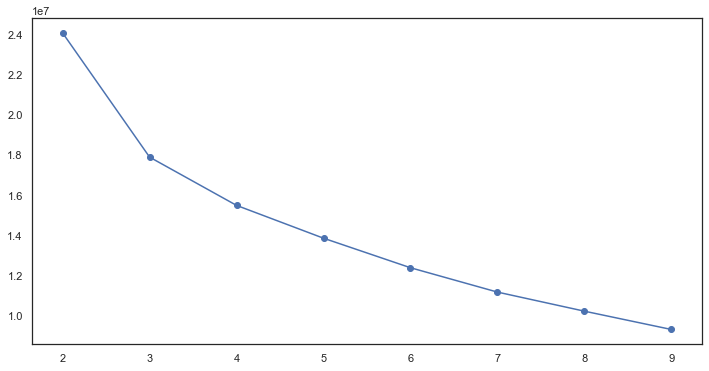

In [623]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

__Observation__: We can observe an elbows at the point 3. So we can go ahead with the clusters count as 3 for further processing.

In [624]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(df_scaled)

prediction=cluster.predict(df_scaled)
df_cluster = df_scaled.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

df_cluster["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

centroids = cluster.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.044985,0.112088,-0.798059,0.710004,-0.930334,0.233654,-0.213858,0.031178,-0.381796
1,0.978481,0.483655,-0.411189,-0.879447,0.922674,-0.608515,0.033050,-0.040459,1.132764
2,-0.633919,-0.414099,1.140115,-0.271759,0.493055,0.100848,0.220107,-0.010836,-0.247338


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000152C932DA48>,
      dtype=object)

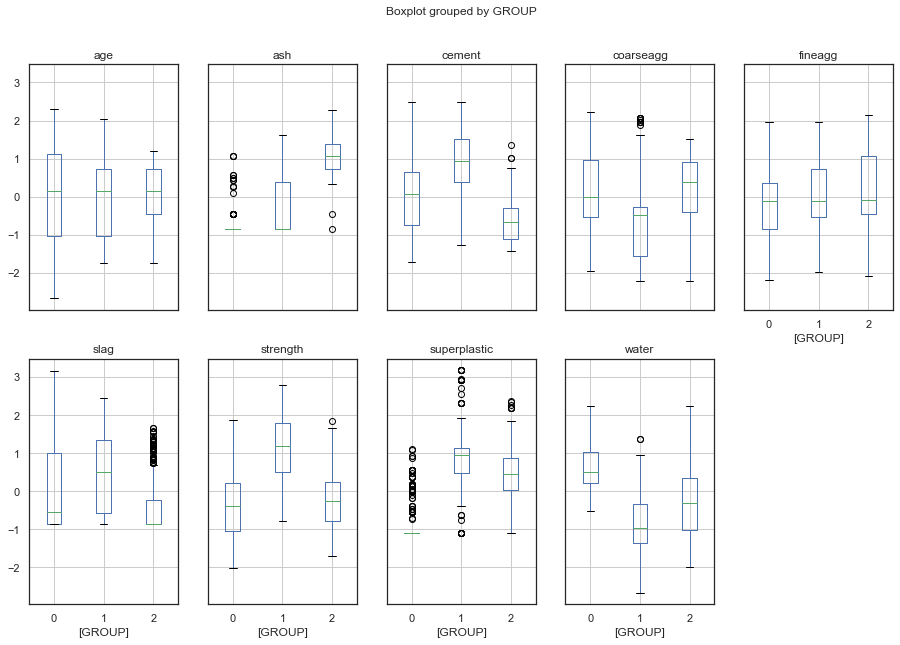

In [625]:
## visual analysis by converting the centroids and the data in the cluster into box plots.
df_cluster.boxplot(by = 'GROUP',  layout=(2,5), figsize=(15, 10))

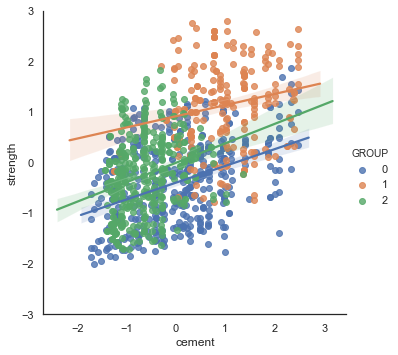

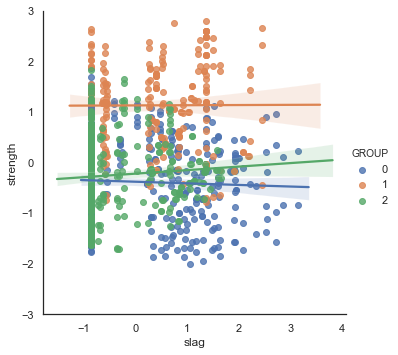

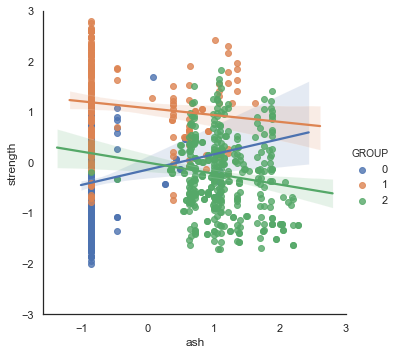

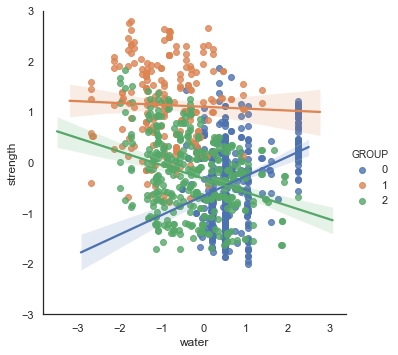

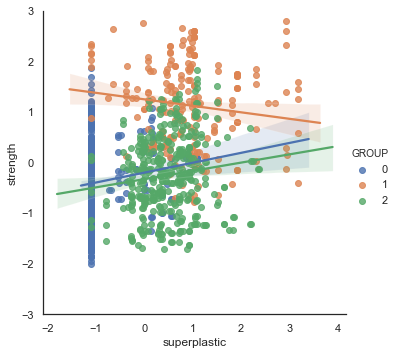

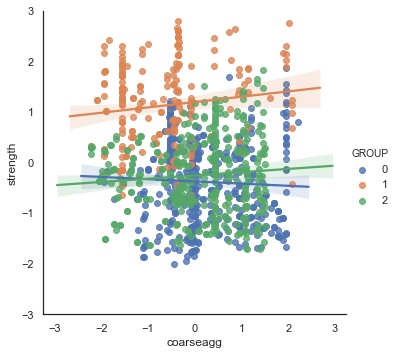

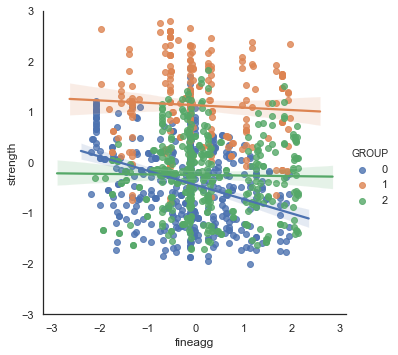

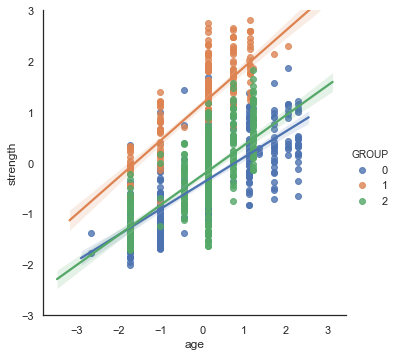

In [626]:
# Let us analyze the strength column vs other columns group wise. 
# strength Vs age

# var = 'age'
i = 1
for var in list(df.drop("strength",axis=1)):
    with sns.axes_style("white"):
        plot = sns.lmplot(var,'strength',data=df_cluster,hue='GROUP')
        i=i+1
    plot.set(ylim = (-3,3))

__Observations__: From the above plots we can observe that there is no correct cluster grouping between input variables and the target variable. We cannt group the input variables data to map them to the target variables group.

## 3. Deliverable -3 (create the model ) 

### a. Obtain feature importance for the individual features and present your findings


                   Imp
cement        0.348891
slag          0.091272
ash           0.007673
water         0.131975
superplastic  0.018178
coarseagg     0.031944
fineagg       0.041355
age           0.328713
For train data score =  0.9948592395522299
For test data score =  0.8585358694460188


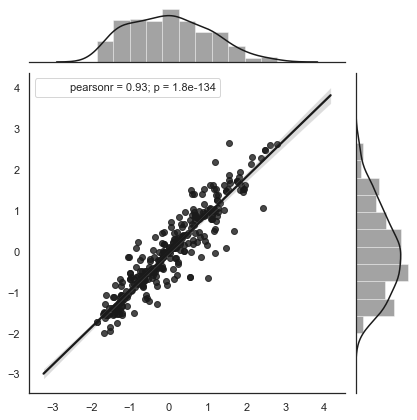

In [627]:
## We will get to know the feature importance through any one of the model.
## We will take Decision Tree model to observe the individual features
# df_scaled = df.apply(zscore)
# ## Separate independent and dependent variables
# X = df_trans.drop('strength', axis=1)
# y = df_trans[['strength']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X_train , y_train)
#printing the feature importance
print (pd.DataFrame(regressor.feature_importances_, columns = ["Imp"], index = X_train.columns))

print('For train data score = ',regressor.score(X_train,y_train))
print('For test data score = ',regressor.score(X_test,y_test))
y_pred = pd.DataFrame(regressor.predict(X_test))
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

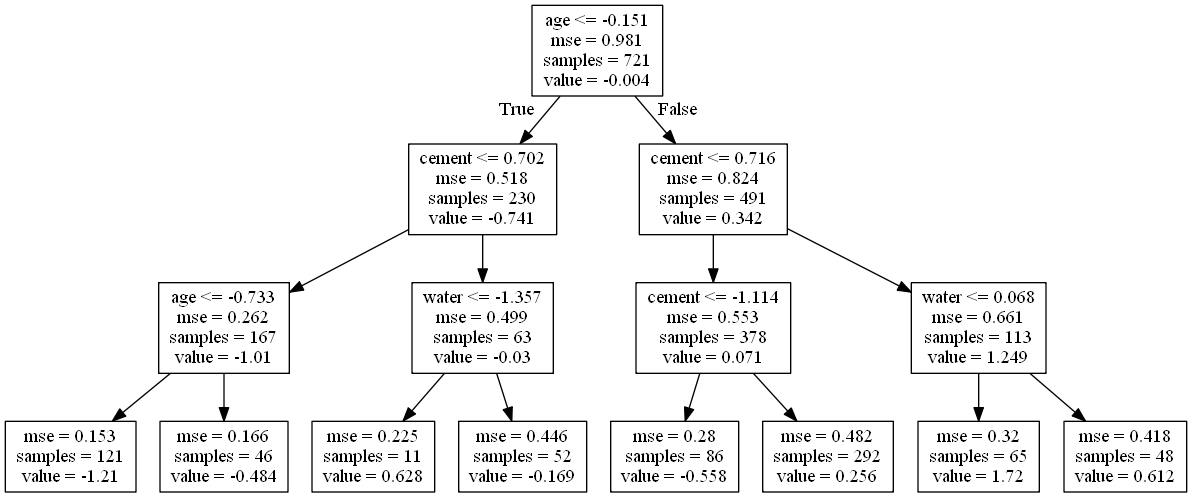

In [628]:
from IPython.display import Image  
from sklearn import tree
from os import system


mpg_Tree_File = open('d:\mpg_tree.dot','w')
dot_data = tree.export_graphviz(regressor, out_file=mpg_Tree_File, feature_names =list(df.drop('strength',axis=1)) )

mpg_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

Image("d:\mpg_tree.png")

In [629]:
## Written a function to drop the given features from the dataset and fit the model to print the final scores.

def dropFeatures(features):
    X_drop = df_scaled.drop( features , axis=1).drop('strength',axis=1)
    y_drop = df_scaled['strength']


    X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop, y_drop, test_size=0.30, random_state=1)

    regressor1 = DecisionTreeRegressor(random_state=0)

    regressor1.fit(X_drop_train , y_drop_train)
    y_drop_pred = regressor1.predict(X_drop_test)

    regressor1.feature_importances_

    print (pd.DataFrame(regressor1.feature_importances_, columns = ["Imp"], index = X_drop_train.columns))
    ## score for both training and test data sets
    print('For train data score = ',regressor1.score(X_drop_train,y_drop_train))
    print('For test data score = ',regressor1.score(X_drop_test,y_drop_test))

    y_drop_pred = regressor1.predict(X_drop_test)
    sns.set(style="darkgrid", color_codes=True)   
    with sns.axes_style("white"):
        sns.jointplot(x=y_drop_test, y=y_drop_pred, stat_func=pearsonr,kind="reg", color="k");
        


------With all the features------
                   Imp
cement        0.348891
slag          0.091272
ash           0.007673
water         0.131975
superplastic  0.018178
coarseagg     0.031944
fineagg       0.041355
age           0.328713
For train data score =  0.9948592395522299
For test data score =  0.8585358694460188


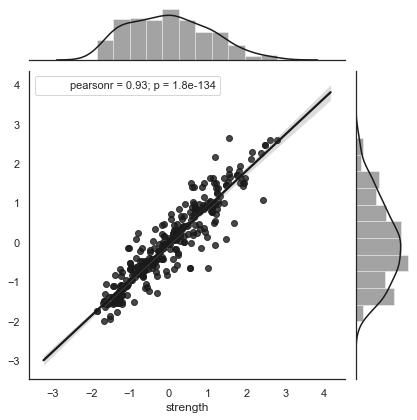



------After dropping the 'ash' column also------
                   Imp
cement        0.348659
slag          0.089989
water         0.134318
superplastic  0.023553
coarseagg     0.035582
fineagg       0.039252
age           0.328648
For train data score =  0.9948592395522299
For test data score =  0.8567179805280836


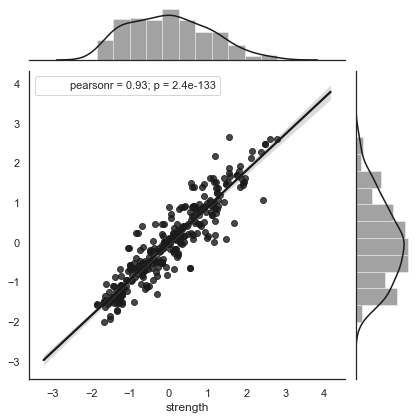



------After dropping the 'superplastic' column also------
                Imp
cement     0.359841
slag       0.091851
water      0.142794
coarseagg  0.035998
fineagg    0.040461
age        0.329055
For train data score =  0.9942258900865857
For test data score =  0.8732082995815674


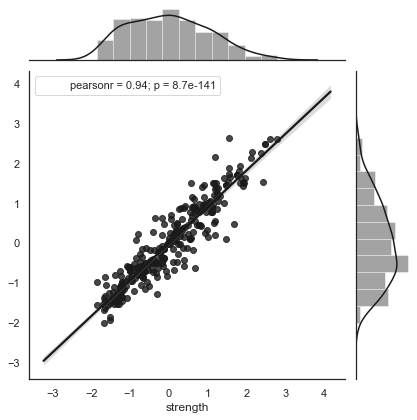



------After dropping the 'coarseagg' column also------
              Imp
cement   0.367529
slag     0.094247
water    0.162137
fineagg  0.045883
age      0.330204
For train data score =  0.9942257988247964
For test data score =  0.8759786794302901


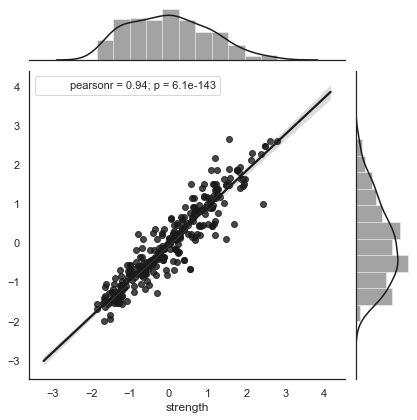



------After dropping the 'fineagg' column also------
             Imp
cement  0.381047
slag    0.112780
water   0.172500
age     0.333672
For train data score =  0.993459432259283
For test data score =  0.8456799479452245


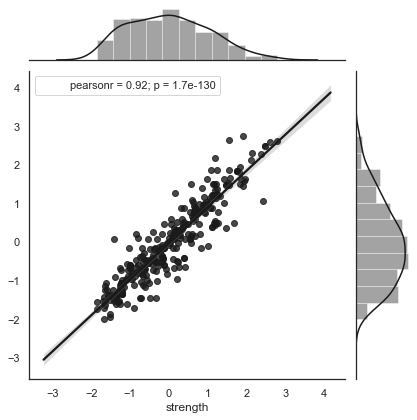



------After dropping the 'slag' column also------
             Imp
cement  0.429965
water   0.226246
age     0.343789
For train data score =  0.989865721703327
For test data score =  0.7064479734112828


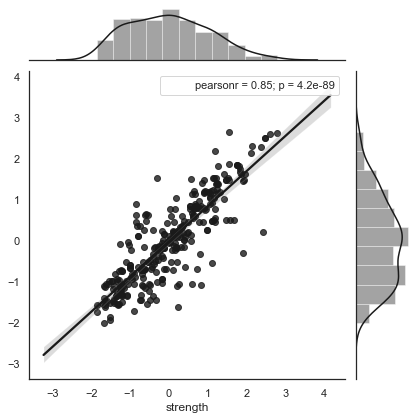

In [740]:
##  ITERATION 0
## 0. Without dropping any columns from the dataset.
print("------With all the features------")
dropFeatures([])
plt.pause(0.1)
print("\n")

##  ITERATION 1
## 1. Dropping the column ash which has least feature score.
print("------After dropping the 'ash' column also------")
dropFeatures(['ash'])
plt.pause(0.1)
print("\n")

##  ITERATION 2
## 2. Dropping the column superplastic also which has next least feature score.
print("------After dropping the 'superplastic' column also------")
dropFeatures(['ash','superplastic'])
plt.pause(0.1)
print("\n")

##  ITERATION 3
## 3. Dropping the column coarseagg also which has next least feature score.
print("------After dropping the 'coarseagg' column also------")
dropFeatures(['ash','superplastic','coarseagg'])
plt.pause(0.1)
print("\n")

##  ITERATION 4
## 4. Dropping the column fineagg also which has next least feature score.
print("------After dropping the 'fineagg' column also------")
dropFeatures(['ash','superplastic','coarseagg','fineagg'])
plt.pause(0.1)
print("\n")


##  ITERATION 5
## 4. Dropping the column slag also which has next least feature score.
print("------After dropping the 'slag' column also------")
dropFeatures(['ash','superplastic','coarseagg','fineagg','slag'])
plt.pause(0.1)
print("\n")

__Observations__: <br><li>From the above outputs we can analyze that the columns 'ash','superplastic','coarseagg','fineagg' have low feature scores from the bottom.<br>
    <li>If we drop the columns upto 'ash','superplastic','coarseagg' we can observe that the test score increased. Training score decreased means it is reducing the overfitting of the model.<br> <li>The pearsonr also increase from 0.93 to 0.94.<br> But if we drop the columns 'fineagg' and 'slag' we can see a sudden fall of the test score and the pearsonr. <br> <li>So from this analysis we can conclude that for this model the columns 'ash','superplastic','coarseagg' are not that much important to get a good score.

## 4. Deliverable -4 (Tuning the model)

### a. Algorithms that you think will be suitable for this project

#### DecisionTree

In [710]:
## From above analysis we can use the same model by dropping the columns 'ash','superplastic','coarseagg' for Decision Tree to get a very good score.
X_drop = df_scaled.drop( ['ash','superplastic','coarseagg'] , axis=1).drop('strength',axis=1)
y_drop = df_scaled['strength']
X_drop_train, X_drop_test, y_drop_train, y_drop_test = train_test_split(X_drop, y_drop, test_size=0.30, random_state=1)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_drop_train , y_train)
## score
print('For train data score = ',dt_model.score(X_drop_train,y_drop_train))
print('For test data score = ',dt_model.score(X_drop_test,y_drop_test))
#Evaluate the model using accuracy
y_drop_pred = dt_model.predict(X_drop_test)
acc_DT=metrics.r2_score(y_drop_test, y_drop_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_drop_test, y_drop_pred))

## Store the test scores for each model in a dataframe for final comparison
final_results = pd.DataFrame({'Algorithm Model':['Decision Tree'], 'Test Accuracy': acc_DT},index={'1'})
# final_results = final_results[['Algorithm Model', 'Test Accuracy']]
final_results

For train data score =  0.9942257988247964
For test data score =  0.8729839500824436
Accuracy DT:  0.8729839500824437
MSE:  0.13258699817110164


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984


#### K-Fold Cross Validation with Decision Tree

In [711]:
num_folds = 18
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = cross_val_score(dt_model,X_drop,y_drop, cv=kfold)
print(scores)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
accuracy_range = (scores.mean()*100.0 -(1.96 * scores.std()*100.0)),(scores.mean()*100.0 +(1.96 * scores.std()*100.0))
print("95 Percent Confidence Accuracy Range is Between: %.3f%%  and %.3f%%" % (accuracy_range))

## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Decision Tree with K-Fold'], 'Test Accuracy':scores.mean()},index={'2'})
final_results = pd.concat([final_results, result])
final_results

[0.78595048 0.81631971 0.87090106 0.85657672 0.92586063 0.9003913
 0.88026137 0.90907595 0.8341429  0.9148439  0.87224574 0.90238479
 0.89173455 0.82371023 0.88591167 0.86845578 0.87530103 0.90869362]
Accuracy: 87.349% (3.677%)
95 Percent Confidence Accuracy Range is Between: 80.143%  and 94.555%


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487


#### Linear Regression with Ridge and Lasso Regularizations

In [712]:
## fit a simple linear model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
## Ridge model
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
##Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
## print ("Lasso model:", (lasso.coef_))
## Let us compare their scores
print('Linear Model')
print('Training score = ',regression_model.score(X_train, y_train))
print('Test score = ',regression_model.score(X_test, y_test))
print('Redge Model')
print('Training score = ',ridge.score(X_train, y_train))
print('Test score = ',ridge.score(X_test, y_test))
print('LASSO Model')
print('Training score = ',lasso.score(X_train, y_train))
print('Test score = ',lasso.score(X_test, y_test))
print ("Lasso model columns:", (lasso.coef_[lasso.coef_!=0]).shape[0])

## Store the test scores in a dataframe for final comparison
result1 = pd.DataFrame({'Algorithm Model':['Linear Regression'], 'Test Accuracy':regression_model.score(X_test, y_test)},index={'3'})
result2 = pd.DataFrame({'Algorithm Model':['Ridge Regularization'], 'Test Accuracy':ridge.score(X_test, y_test)},index={'4'})
result3 = pd.DataFrame({'Algorithm Model':['Lasso Regularization with Columns=7'], 'Test Accuracy':lasso.score(X_test, y_test)},index={'5'})

final_results = pd.concat([final_results, result1])
final_results = pd.concat([final_results, result2])
final_results = pd.concat([final_results, result3])
final_results

Linear Model
Training score =  0.8225671456788749
Test score =  0.8227206430743396
Redge Model
Training score =  0.8225664786045997
Test score =  0.8226741066904812
LASSO Model
Training score =  0.8212303082397724
Test score =  0.8184991503450847
Lasso model columns: 7


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499


#### Regression and Regularization with Poly Features

In [713]:
## From our previous observation the regression with ploynomial features of degree with 3 and the Lasso regression we got high score with test dataset.
regression_model = LinearRegression()
poly = PolynomialFeatures(degree = 3, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.30, random_state=1)
print('Shape = ',X_train_poly.shape)
## Fit a simple non regularized linear model on poly features-
regression_model.fit(X_train_poly, y_train_poly)
##print(regression_model.coef_[0])
## Ridge model
ridge = Ridge(alpha=.3)
ridge.fit(X_train_poly,y_train_poly)
##print ("Ridge model:", (ridge.coef_))
##Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_poly,y_train_poly)
##print ("Lasso model:", (lasso.coef_))
## Let us compare their scores
print('Linear Model')
print('Training score = ',regression_model.score(X_train_poly, y_train_poly))
print('Test score = ',regression_model.score(X_test_poly, y_test_poly))
print('Redge Model')
print('Training score = ',ridge.score(X_train_poly, y_train_poly))
print('Test score = ',ridge.score(X_test_poly, y_test_poly))
print('LASSO Model')
print('Training score = ',lasso.score(X_train_poly, y_train_poly))
print('Test score = ',lasso.score(X_test_poly, y_test_poly))
print ("Lasso model columns:", (lasso.coef_[lasso.coef_!=0]).shape[0])

## Store the test scores in a dataframe for final comparison
result1 = pd.DataFrame({'Algorithm Model':['Linear Model with Poly Features Degree=3'], 'Test Accuracy':regression_model.score(X_test_poly, y_test_poly)},index={'5'})
result2 = pd.DataFrame({'Algorithm Model':['Ridge Regularization with Poly Features Degree=3'], 'Test Accuracy':ridge.score(X_test_poly, y_test_poly)},index={'6'})
result3 = pd.DataFrame({'Algorithm Model':['Lasso Regularization with Poly Features Degree=3 Columns=85'], 'Test Accuracy':lasso.score(X_test_poly, y_test_poly)},index={'7'})

final_results = pd.concat([final_results, result1])
final_results = pd.concat([final_results, result2])
final_results = pd.concat([final_results, result3])
final_results

Shape =  (721, 93)
Linear Model
Training score =  0.9174002317955174
Test score =  0.8854068590302281
Redge Model
Training score =  0.9173799388484627
Test score =  0.8855072839290955
LASSO Model
Training score =  0.9167541375971701
Test score =  0.8877620792560877
Lasso model columns: 85


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762


#### K-Means Clustering

In [714]:
k_means = KMeans( n_clusters = 3, random_state = 2354 )
k_means.fit(X_scaled)
# predict the cluster for each data point
y_cluster_kmeans = k_means.predict(X_scaled)
y_cluster_kmeans
## Silhouette score
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
score
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['K-Means with cluster=3 Silhousette score'], 'Test Accuracy':score},index={'8'})

final_results = pd.concat([final_results, result])
final_results

,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043


#### Random Forest

In [715]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Train data score:',rf.score(X_train,y_train))
print('Test data score:',rf.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Random Forest'], 'Test Accuracy':acc_RFR},index={'9'})

final_results = pd.concat([final_results, result])
final_results

Train data score: 0.9773800371466935
Test data score: 0.8939908862210244
Accuracy DT:  0.8939908862210244
MSE:  0.11065869379386514


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Random Forest with K-Fold cross validation

In [716]:
num_folds = 18
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = cross_val_score(rf,X_scaled,y_scaled, cv=kfold)
print(scores)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
accuracy_range = (scores.mean()*100.0 -(1.96 * scores.std()*100.0)),(scores.mean()*100.0 +(1.96 * scores.std()*100.0))
print("95 Percent Confidence Accuracy Range is Between: %.3f%%  and %.3f%%" % (accuracy_range))

## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Random Forest with K-Fold'], 'Test Accuracy':scores.mean()},index={'10'})
final_results = pd.concat([final_results, result])
final_results

[0.83969232 0.86793615 0.88615167 0.93168719 0.95454208 0.91908619
 0.91771351 0.92335177 0.85771348 0.93897489 0.93628087 0.9261229
 0.92608537 0.9050048  0.89553017 0.93938353 0.91627144 0.93470632]
Accuracy: 91.201% (3.029%)
95 Percent Confidence Accuracy Range is Between: 85.265%  and 97.138%


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Gradient Boosting Regressor

In [717]:
gb=GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Train data score:',gb.score(X_train,y_train))
print('Test data score:',gb.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Gradient Booster'], 'Test Accuracy':acc_RFR},index={'11'})

final_results = pd.concat([final_results, result])
final_results

Train data score: 0.9519496837590732
Test data score: 0.8975798533220007
Accuracy DT:  0.8975798533220007
MSE:  0.10691231390910123


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Gradient Boosting with K-Fold

In [718]:
num_folds = 18
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = cross_val_score(gb,X_scaled,y_scaled, cv=kfold)
print(scores)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
accuracy_range = (scores.mean()*100.0 -(1.96 * scores.std()*100.0)),(scores.mean()*100.0 +(1.96 * scores.std()*100.0))
print("95 Percent Confidence Accuracy Range is Between: %.3f%%  and %.3f%%" % (accuracy_range))

## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Gradient Booster with K-Fold'], 'Test Accuracy':scores.mean()},index={'12'})
final_results = pd.concat([final_results, result])
final_results

[0.84590039 0.90160821 0.89040612 0.89652691 0.94936704 0.87144561
 0.91343159 0.91253956 0.85923931 0.90646355 0.93327757 0.94490156
 0.92981505 0.92223698 0.89192637 0.93769554 0.89999498 0.90627719]
Accuracy: 90.628% (2.754%)
95 Percent Confidence Accuracy Range is Between: 85.231%  and 96.025%


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Ada Boosting Regressor

In [719]:
abr=AdaBoostRegressor()
abr.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Train data score:',abr.score(X_train,y_train))
print('Test data score:',abr.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Ada Booster'], 'Test Accuracy':acc_RFR},index={'13'})

final_results = pd.concat([final_results, result])
final_results

Train data score: 0.8206578481197893
Test data score: 0.7609583576497031
Accuracy DT:  0.8975798533220007
MSE:  0.10691231390910123


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Ada Booster with K-Fold

In [720]:
num_folds = 18
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = cross_val_score(abr,X_scaled,y_scaled, cv=kfold)
print(scores)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
accuracy_range = (scores.mean()*100.0 -(1.96 * scores.std()*100.0)),(scores.mean()*100.0 +(1.96 * scores.std()*100.0))
print("95 Percent Confidence Accuracy Range is Between: %.3f%%  and %.3f%%" % (accuracy_range))

## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Ada Booster with K-Fold'], 'Test Accuracy':scores.mean()},index={'14'})
final_results = pd.concat([final_results, result])
final_results

[0.70949502 0.76887018 0.77076568 0.81242745 0.84785988 0.72215359
 0.73911526 0.83505503 0.7797461  0.83926618 0.79256885 0.75001588
 0.79000055 0.74329908 0.75613043 0.80984733 0.82289021 0.74902756]
Accuracy: 77.992% (4.025%)
95 Percent Confidence Accuracy Range is Between: 70.103%  and 85.881%


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Bagging Regressor

In [721]:
bgr=BaggingRegressor()
bgr.fit(X_train, y_train)
y_pred = bgr.predict(X_test)
print('Train data score:',bgr.score(X_train,y_train))
print('Test data score:',bgr.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Bagging Regressor'], 'Test Accuracy':acc_RFR},index={'15'})

final_results = pd.concat([final_results, result])
final_results

Train data score: 0.9775027820294722
Test data score: 0.8840604469272682
Accuracy DT:  0.8840604469272682
MSE:  0.12102468405520696


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Bagging Regressor with K-Fold

In [722]:
num_folds = 18
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = cross_val_score(bgr,X_scaled,y_scaled, cv=kfold)
print(scores)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
accuracy_range = (scores.mean()*100.0 -(1.96 * scores.std()*100.0)),(scores.mean()*100.0 +(1.96 * scores.std()*100.0))
print("95 Percent Confidence Accuracy Range is Between: %.3f%%  and %.3f%%" % (accuracy_range))

## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Bagging Regressor with K-Fold'], 'Test Accuracy':scores.mean()},index={'16'})
final_results = pd.concat([final_results, result])
final_results

[0.82226206 0.87699438 0.89773715 0.89714455 0.96041767 0.8996131
 0.93523677 0.92191366 0.87359513 0.93165896 0.93122895 0.92627726
 0.92568567 0.90237668 0.87304033 0.93095242 0.91257683 0.94743607]
Accuracy: 90.923% (3.210%)
95 Percent Confidence Accuracy Range is Between: 84.631%  and 97.215%


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### KNN Regressor

Text(0, 0.5, 'Mean error')

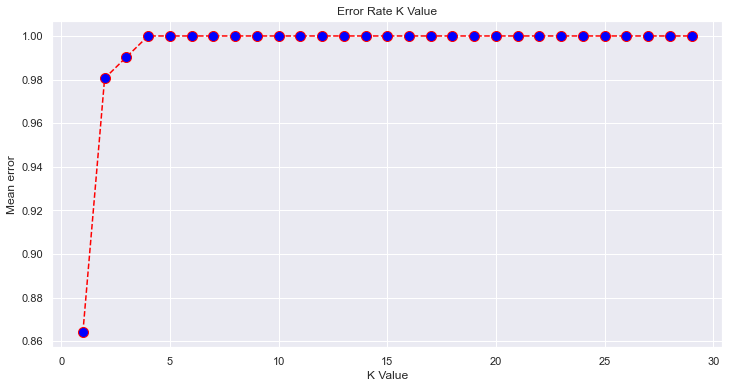

In [723]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [724]:
#k=3
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Train data score:',knn.score(X_train,y_train))
print('Test data score:',knn.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['KNN Regressor'], 'Test Accuracy':acc_RFR},index={'17'})

final_results = pd.concat([final_results, result])
final_results

Train data score: 0.933939210260681
Test data score: 0.8461917568992798
Accuracy DT:  0.84619175689928
MSE:  0.16055430207388924


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### KNN Regressor wiht K-Fold

In [725]:
num_folds = 18
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = cross_val_score(knn,X_scaled,y_scaled, cv=kfold)
print(scores)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
accuracy_range = (scores.mean()*100.0 -(1.96 * scores.std()*100.0)),(scores.mean()*100.0 +(1.96 * scores.std()*100.0))
print("95 Percent Confidence Accuracy Range is Between: %.3f%%  and %.3f%%" % (accuracy_range))

## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['KNN Regressor with K-Fold'], 'Test Accuracy':scores.mean()},index={'18'})
final_results = pd.concat([final_results, result])
final_results

[0.71176853 0.89530344 0.8749918  0.89942362 0.93513328 0.87360556
 0.89797417 0.86773797 0.8134357  0.91505384 0.92647696 0.91262155
 0.89451741 0.8926432  0.83212662 0.88851185 0.90542676 0.90278685]
Accuracy: 87.997% (5.015%)
95 Percent Confidence Accuracy Range is Between: 78.167%  and 97.828%


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Support Vector Regressor

In [726]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('Train data score:',svr.score(X_train,y_train))
print('Test data score:',svr.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['SVM Regressor'], 'Test Accuracy':acc_RFR},index={'19'})

final_results = pd.concat([final_results, result])
final_results

Train data score: 0.8191948864223693
Test data score: 0.8147577768306383
Accuracy DT:  0.8147577768306383
MSE:  0.19336698252314458


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Support Vector Regressor with K-Fold

In [727]:
num_folds = 18
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
scores = cross_val_score(svr,X_scaled,y_scaled, cv=kfold)
print(scores)
print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()*100.0))
accuracy_range = (scores.mean()*100.0 -(1.96 * scores.std()*100.0)),(scores.mean()*100.0 +(1.96 * scores.std()*100.0))
print("95 Percent Confidence Accuracy Range is Between: %.3f%%  and %.3f%%" % (accuracy_range))

## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['SVM Regressor with K-Fold'], 'Test Accuracy':scores.mean()},index={'20'})
final_results = pd.concat([final_results, result])
final_results

[0.62653911 0.83833275 0.78588779 0.85806528 0.87765697 0.76019069
 0.7861982  0.88729954 0.77774893 0.81189808 0.84284506 0.88721361
 0.81320333 0.7690874  0.8347598  0.78535287 0.77357432 0.80015131]
Accuracy: 80.644% (5.923%)
95 Percent Confidence Accuracy Range is Between: 69.036%  and 92.253%


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


__Note__: From the above observations it seems that Random Forest with K-Fold, Gradient Booster with K-Fold and Bagging Regressor with K-Fold has highest score and better 95% confidency accuracy range compare to other algorithms.<br>
So we can perform further tuning like Hyper Parameters applying and the Bootstrap Sampling on these three models.

### b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

__Note__: From the above observations it seems that Random Forest with K-Fold, Gradient Booster with K-Fold and Bagging Regressor with K-Fold has highest score and better 95% confidency accuracy range compare to other algorithms.<br>
So we can perform further tuning like Hyper Parameters applying and the Bootstrap Sampling on these three models.

#### Hyper Parameter Tuning with GridSearchCV

#### RandomForestRegressor Tuning GridSearchCV

In [728]:
for clf, label in zip([rf], 
    ['rf']):
    print("model name: " , label)
    print("\n model_hyperparameters \n" , clf.get_params() )

model name:  rf

 model_hyperparameters 
 {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [729]:
# specify parameters and distributions to sample from
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# run grid search
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
rf_grid.fit(X_train, y_train)
print("Best parameters : ",rf_grid.best_params_)

y_pred = rf_grid.predict(X_test)
print('Train data score:',rf_grid.score(X_train,y_train))
print('Test data score:',rf_grid.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Random Forest with GridSearchCV'], 'Test Accuracy':acc_RFR},index={'21'})

final_results = pd.concat([final_results, result])
final_results


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.8min finished


Best parameters :  {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
Train data score: 0.9412206755525391
Test data score: 0.8701922222894004
Accuracy DT:  0.8701922222894005
MSE:  0.13550117167933687


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Gradient Booster Tuning with GridSearchCV

In [730]:
# specify parameters and distributions to sample from
# Create the parameter grid based on the results of random search 
param_grid = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

# run grid search
gb_grid = GridSearchCV(estimator = gb, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
gb_grid.fit(X_train, y_train)
print("Best parameters : ",gb_grid.best_params_)

y_pred = gb_grid.predict(X_test)
print('Train data score:',gb_grid.score(X_train,y_train))
print('Test data score:',gb_grid.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Gradient Booster with GridSearchCV'], 'Test Accuracy':acc_RFR},index={'22'})

final_results = pd.concat([final_results, result])
final_results


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.3min finished


Best parameters :  {'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.2}
Train data score: 0.9919016728069664
Test data score: 0.9285135129660784
Accuracy DT:  0.9285135129660783
MSE:  0.07462189803396628


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Bagging Regressor tuning with GridSearchCV

In [731]:
# specify parameters and distributions to sample from
# Create the parameter grid based on the results of random search 
param_grid = {"max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "bootstrap_features": [True, False]}

# run grid search
rf=RandomForestRegressor()
bgr_grid = GridSearchCV(estimator = bgr, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
bgr_grid.fit(X_train, y_train)
print("Best parameters : ",grid_search.best_params_)

y_pred = bgr_grid.predict(X_test)
print('Train data score:',bgr_grid.score(X_train,y_train))
print('Test data score:',bgr_grid.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Bagging Regressor with GridSearchCV'], 'Test Accuracy':acc_RFR},index={'23'})

final_results = pd.concat([final_results, result])
final_results

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters :  {'max_samples': 1.0, 'max_features': 1.0, 'bootstrap_features': False, 'bootstrap': True}
Train data score: 0.9754023787346544
Test data score: 0.8903419455553171
Accuracy DT:  0.8903419455553172
MSE:  0.11446767769538461


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.1s finished


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Hyper Parameter Tuning with RandomizedSearchCV

#### RandomForestRegressor Tuning RandomizedSearchCV

In [732]:
# specify parameters and distributions to sample from
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# run grid search
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print("Best parameters : ",grid_search.best_params_)

y_pred = rf_random.predict(X_test)
print('Train data score:',rf_random.score(X_train,y_train))
print('Test data score:',rf_random.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Random Forest Regressor with RandomizedSearchCV'], 'Test Accuracy':acc_RFR},index={'24'})

final_results = pd.concat([final_results, result])
final_results

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


Best parameters :  {'max_samples': 1.0, 'max_features': 1.0, 'bootstrap_features': False, 'bootstrap': True}
Train data score: 0.9835458574897915
Test data score: 0.9017103890981908
Accuracy DT:  0.9017103890981908
MSE:  0.10260061204340123


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Gradient Booster tuning with RandomizedSearchCV

In [733]:
# specify parameters and distributions to sample from
loss = ['ls', 'lad', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]
# Create the random grid
random_grid = {'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features}

# run grid search
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
gb_random.fit(X_train, y_train)
print("Best parameters : ",gb_random.best_params_)

y_pred = gb_random.predict(X_test)
print('Train data score:',gb_random.score(X_train,y_train))
print('Test data score:',gb_random.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Gradient Booster with RandomizedSearchCV'], 'Test Accuracy':acc_RFR},index={'25'})

final_results = pd.concat([final_results, result])
final_results

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.0min finished


Best parameters :  {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 5, 'loss': 'ls'}
Train data score: 0.9901034837922752
Test data score: 0.9232471183351535
Accuracy DT:  0.9232471183351535
MSE:  0.08011927774111322


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


#### Bagging Regressor tuning with RandomizedSearchCV

In [734]:
# specify parameters and distributions to sample from
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = [1,10]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
random_grid = {"max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "bootstrap": [True, False],
                          "bootstrap_features": [True, False]}
# run grid search
bgr_random = RandomizedSearchCV(estimator = bgr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
bgr_random.fit(X_train, y_train)
print("Best parameters : ",bgr_random.best_params_)

y_pred = bgr_random.predict(X_test)
print('Train data score:',bgr_random.score(X_train,y_train))
print('Test data score:',bgr_random.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
## Store the test scores in a dataframe for final comparison
result = pd.DataFrame({'Algorithm Model':['Bagging Regressor with RandomizedSearchCV'], 'Test Accuracy':acc_RFR},index={'26'})

final_results = pd.concat([final_results, result])
final_results

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters :  {'max_samples': 1.0, 'max_features': 1.0, 'bootstrap_features': False, 'bootstrap': True}
Train data score: 0.9770949055335737
Test data score: 0.8950685918131923
Accuracy DT:  0.8950685918131923
MSE:  0.10953371982820881


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.3s finished


,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


### c. Model performance range at 95% confidence level

__Note__: <br>
<li>From the above observations it seems that Random Forest with K-Fold, Gradient Booster with K-Fold and Bagging Regressor with K-Fold has highest score and better 95% confidency accuracy range compare to other algorithms.<br>
<li>So we can perform further bootstrap sampling on these models to evaluate the 95% confidence level.

#### Bootstrap Sampling using Gradient Boosting Regressor


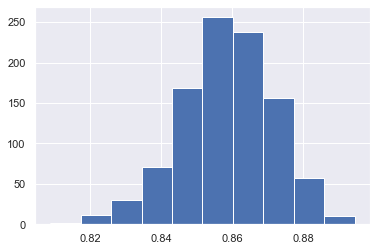

95.0 confidence interval 83.1% and 88.1%


In [735]:
values = df_scaled.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(df_scaled) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)
    
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Bootstrap Sampling using Random Forest Regressor

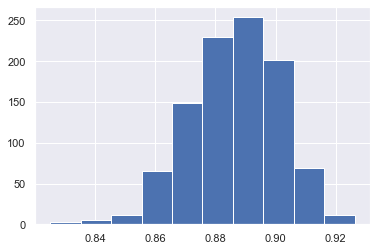

95.0 confidence interval 85.8% and 91.3%


In [736]:
values = df_scaled.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(df_scaled) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)
    
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Bootstrap Sampling using Bagging Regressor

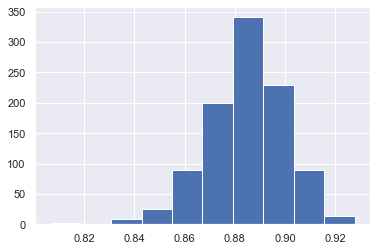

95.0 confidence interval 85.2% and 91.2%


In [737]:
values = df_scaled.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(df_scaled) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = BaggingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)
    
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [738]:
final_results

,Algorithm Model,Test Accuracy
1,Decision Tree,0.872984
2,Decision Tree with K-Fold,0.873487
3,Linear Regression,0.822721
4,Ridge Regularization,0.822674
5,Lasso Regularization with Columns=7,0.818499
5,Linear Model with Poly Features Degree=3,0.885407
6,Ridge Regularization with Poly Features Degree=3,0.885507
7,Lasso Regularization with Poly Features Degree...,0.887762
8,K-Means with cluster=3 Silhousette score,0.215043
9,Random Forest,0.893991


__Conclusions__:<br>
<li>From the above scores table Gradient Booster with GridSearchCV and RandomizedSearchCV has the hieghest test scores greater than 0.92 compare to all the other models.
<li>In the same way Bootstrap Sampling using Random Forest Regressor has the hieghest 95% accuracy confidence interval range between 85.8% and 91.3% compare to other models.